# AI-Powered Data Visualization: Dhaka Housing Prices Insights

**Project Objective:** To leverage AI and advanced data visualization techniques to explore a synthetic dataset representing the Dhaka housing market. This project aims to uncover patterns, predict property prices, and present insights through compelling and modern visualizations.

**Dataset:** A synthetically generated dataset for Dhaka, including features like property size, number of bedrooms/bathrooms, age, floor level, geospatial coordinates, categorical features like location type (e.g., 'Gulshan', 'Dhanmondi', 'Mirpur', 'Uttara') and property type, and a target variable: `Price_BDT_Lakhs`.

### 0. Setup & Environment Configuration

Importing necessary libraries, setting up the visual style for our plots, and defining the function to generate our synthetic Dhaka Housing dataset.

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# For Interactive Visualizations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium # For maps

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Model Explainability
import shap # Make sure to install if not present: !pip install shap

# Settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Nicer float display

# --- Visual Style ---
# Apply a dark theme for modern, professional plots
plt.style.use('dark_background')
# Define a modern color palette for dark backgrounds
# Example: using a list of hex codes. Adjust as preferred.
# These are just examples, you can find many professional palettes online.
modern_palette_dark = ["#4ECCA3", "#232931", "#EEEEEE", "#FF5733", "#393E46", "#FFC300", "#DAF7A6"]
# For seaborn, you can also set a specific context and style
sns.set_context("notebook") # Options: paper, notebook, talk, poster
sns.set_palette(modern_palette_dark) # Set custom palette for seaborn
# For Plotly, we will set the template to 'plotly_dark'

print("Libraries imported and visual style configured.")
print(f"Matplotlib style: {plt.style.available}") # Show available styles
print(f"Using: 'dark_background'")

Libraries imported and visual style configured.
Matplotlib style: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Using: 'dark_background'


In [4]:
# --- Synthetic Dhaka Housing Dataset Generation ---
def generate_dhaka_housing_data(num_samples=1500):
    """Generates a synthetic dataset for Dhaka housing."""
    np.random.seed(42) # for reproducibility

    # Dhaka-centric locations (approximate centers for some areas)
    locations_dhaka = {
        'Gulshan': {'lat': (23.7925, 0.005), 'lon': (90.4078, 0.005), 'price_factor': 2.5, 'amenity_factor': 0.9, 'dev_status': 'Prime Location'},
        'Banani': {'lat': (23.7920, 0.004), 'lon': (90.4040, 0.004), 'price_factor': 2.3, 'amenity_factor': 0.85, 'dev_status': 'Prime Location'},
        'Dhanmondi': {'lat': (23.7465, 0.008), 'lon': (90.3760, 0.008), 'price_factor': 2.0, 'amenity_factor': 0.8, 'dev_status': 'Established Residential'},
        'Baridhara': {'lat': (23.8100, 0.003), 'lon': (90.4180, 0.003), 'price_factor': 2.6, 'amenity_factor': 0.88, 'dev_status': 'Prime Location'},
        'Uttara': {'lat': (23.8750, 0.015), 'lon': (90.3850, 0.015), 'price_factor': 1.5, 'amenity_factor': 0.7, 'dev_status': 'Developing Suburb'},
        'Mirpur': {'lat': (23.8020, 0.012), 'lon': (90.3580, 0.012), 'price_factor': 1.0, 'amenity_factor': 0.6, 'dev_status': 'Populous Residential'},
        'Mohammadpur': {'lat': (23.7600, 0.007), 'lon': (90.3600, 0.007), 'price_factor': 1.3, 'amenity_factor': 0.65, 'dev_status': 'Established Residential'},
        'Bashundhara R/A': {'lat': (23.8150, 0.006), 'lon': (90.4250, 0.006), 'price_factor': 1.8, 'amenity_factor': 0.75, 'dev_status': 'Planned Residential'},
        'Old Dhaka': {'lat': (23.7100, 0.01), 'lon': (90.4070, 0.01), 'price_factor': 0.8, 'amenity_factor': 0.5, 'dev_status': 'Historic & Congested'}
    }
    location_names = list(locations_dhaka.keys())

    data = []
    for i in range(num_samples):
        loc_name = np.random.choice(location_names)
        loc_details = locations_dhaka[loc_name]

        lat = np.random.normal(loc_details['lat'][0], loc_details['lat'][1])
        lon = np.random.normal(loc_details['lon'][0], loc_details['lon'][1])

        area_sq_ft = np.random.randint(700, 4500)
        num_bedrooms = np.random.choice([2, 3, 4, 5], p=[0.2, 0.4, 0.3, 0.1])
        num_bathrooms = np.random.randint(max(1, num_bedrooms - 2), num_bedrooms + 1) # Bathrooms usually less than or equal to bedrooms
        age_of_property_years = np.random.randint(0, 35)
        floor_level = np.random.randint(1, np.random.choice([5, 10, 15, 20], p=[0.3,0.4,0.2,0.1])) # Max floor depends on building type

        # Categorical Features
        property_type = np.random.choice(['Apartment', 'Duplex', 'Penthouse', 'Standalone Floor'], p=[0.75, 0.10, 0.05, 0.10])
        lift_available = np.random.choice(['Yes', 'No'], p=[0.80 if floor_level > 3 else 0.3, 0.20 if floor_level > 3 else 0.7]) # Lift more likely in higher floors
        parking_space = np.random.choice(['Available', 'Not Available', 'Shared'], p=[0.6, 0.3, 0.1])

        # Numerical Features influenced by location
        proximity_to_main_road_km = abs(np.random.normal(0.5, 0.3 * (1/loc_details['amenity_factor']))) # Prime locations often closer
        proximity_to_main_road_km = max(0.05, proximity_to_main_road_km) # Ensure positive

        nearby_amenities_score = int(np.clip(np.random.normal(7, 2) * loc_details['amenity_factor'] * (1.2 if property_type == 'Penthouse' else 1), 1, 10))

        # Base price calculation (more sophisticated)
        base_price = 50  # Base price in Lakhs BDT
        price = base_price + \
                (area_sq_ft / 100) * (5 + num_bedrooms * 2) * loc_details['price_factor'] + \
                num_bedrooms * 15 * loc_details['price_factor'] + \
                num_bathrooms * 10 * loc_details['price_factor'] + \
                (5 - age_of_property_years / 10) * 5 * loc_details['price_factor'] + \
                (floor_level / 5) * 3 * (1 if lift_available == 'Yes' else 0.5) + \
                (10 if parking_space == 'Available' else 0) * loc_details['price_factor'] + \
                nearby_amenities_score * 5 * loc_details['price_factor'] + \
                (30 if property_type == 'Penthouse' else (15 if property_type == 'Duplex' else 0)) * loc_details['price_factor'] - \
                proximity_to_main_road_km * 20 * (1/loc_details['price_factor'])


        # Add some random noise
        price *= np.random.normal(1, 0.10)
        price = max(30, price) # Minimum price cap

        data.append([
            lat, lon, area_sq_ft, num_bedrooms, num_bathrooms,
            age_of_property_years, floor_level, property_type,
            lift_available, parking_space, proximity_to_main_road_km,
            nearby_amenities_score, loc_name, # loc_name is the location_type
            round(price, 2)
        ])

    df = pd.DataFrame(data, columns=[
        'Latitude', 'Longitude', 'Area_sq_ft', 'Num_Bedrooms',
        'Num_Bathrooms', 'Age_of_Property_years', 'Floor_Level',
        'Property_Type', 'Lift_Available', 'Parking_Space',
        'Proximity_to_Main_Road_km', 'Nearby_Amenities_Score',
        'Location_Name', 'Price_BDT_Lakhs'
    ])
    return df

print("Synthetic data generation function defined.")

Synthetic data generation function defined.


### 1. AI in Data Science & AI-Enhanced Data Analysis Concepts

**AI in Data Science:** Artificial Intelligence is revolutionizing data science by providing tools and techniques to extract deeper insights, automate complex tasks, and build predictive models with higher accuracy. It encompasses machine learning, deep learning, natural language processing, and computer vision, enabling data scientists to tackle problems previously considered intractable.

**AI-Enhanced Data Analysis Concepts:**
* **Automated Feature Engineering & Selection:** AI algorithms can automatically create new relevant features from existing data or select the most impactful features for modeling, reducing manual effort and potentially uncovering non-obvious relationships.
* **Advanced Pattern Recognition:** Machine learning models (e.g., clustering, anomaly detection) can identify subtle patterns, groupings, and outliers in high-dimensional data that might be missed by traditional statistical methods.
* **Predictive Modeling at Scale:** AI enables the development of sophisticated models that can predict future outcomes (like housing prices, customer churn) with greater precision and adapt to new data over time.
* **Explainable AI (XAI):** Techniques like SHAP and LIME help in understanding the "why" behind AI model predictions, making them more transparent and trustworthy, which is crucial for critical applications.
* **Generative AI for Data Augmentation:** AI can generate synthetic data that mimics real-world data, useful for augmenting small datasets, balancing classes, or testing model robustness.
* **Hyperparameter Optimization:** AI-driven techniques can efficiently search for the optimal hyperparameters for machine learning models, leading to better performance.

### 2. Practical Applications of AI in Housing & Real Estate

AI is increasingly applied in the real estate sector for:
* **Automated Valuation Models (AVMs):** Predicting property prices with higher accuracy than traditional methods by analyzing vast amounts of data.
* **Market Trend Analysis & Forecasting:** Identifying emerging market trends, hotspots, and future price movements.
* **Personalized Property Recommendations:** Matching buyers with properties based on their preferences and behavior, similar to recommendation engines in e-commerce.
* **Real Estate Investment Analysis:** Identifying lucrative investment opportunities by analyzing risk and return profiles of properties and locations.
* **Urban Planning and Development:** Assisting city planners in understanding housing demand, infrastructure needs, and optimizing urban development.
* **Automated Property Description Generation:** Using NLP to create engaging property listings.
* **Virtual Tours and Staging:** Using AR/VR and AI to create immersive property viewing experiences.

### 3. Data Loading and Initial Overview

Loading our synthetically generated Dhaka Housing dataset and performing an initial inspection.

In [25]:
df_housing = generate_dhaka_housing_data(num_samples=2000)

print("--- Dhaka Housing Dataset (First 5 Rows) ---")
display(df_housing.head())

--- Dhaka Housing Dataset (First 5 Rows) ---


Latitude  Longitude  Area_sq_ft  Num_Bedrooms  Num_Bathrooms  \
0    23.756     90.364        1795             3              3   
1    23.796     90.329        2747             3              3   
2    23.812     90.415        4199             3              3   
3    23.807     90.420        1155             3              1   
4    23.792     90.406        1852             2              2   

   Age_of_Property_years  Floor_Level Property_Type Lift_Available  \
0                     18            3     Penthouse             No   
1                      2            7     Apartment            Yes   
2                     34            4     Apartment            Yes   
3                     20            2     Apartment             No   
4                     10            4     Apartment            Yes   

   Parking_Space  Proximity_to_Main_Road_km  Nearby_Amenities_Score  \
0  Not Available                      0.283                       6   
1         Shared                      0.802                       3   
2      Available                      0.610                       3   
3         Shared                      0.558                       3   
4      Available                      0.220                       5   

  Location_Name  Price_BDT_Lakhs  
0   Mohammadpur          476.380  
1        Mirpur          441.080  
2     Baridhara         1196.260  
3     Baridhara          640.750  
4       Gulshan          754.010

In [19]:
print("\n--- Dataset Information ---")
df_housing.info()


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   2000 non-null   float64
 1   Longitude                  2000 non-null   float64
 2   Area_sq_ft                 2000 non-null   int64  
 3   Num_Bedrooms               2000 non-null   int64  
 4   Num_Bathrooms              2000 non-null   int64  
 5   Age_of_Property_years      2000 non-null   int64  
 6   Floor_Level                2000 non-null   int64  
 7   Property_Type              2000 non-null   object 
 8   Lift_Available             2000 non-null   object 
 9   Parking_Space              2000 non-null   object 
 10  Proximity_to_Main_Road_km  2000 non-null   float64
 11  Nearby_Amenities_Score     2000 non-null   int64  
 12  Location_Name              2000 non-null   object 
 13  Price_BDT_Lakhs    

In [23]:
print("\n--- Descriptive Statistics (Numerical Features) ---")
display(df_housing.describe())


--- Descriptive Statistics (Numerical Features) ---


Latitude  Longitude  Area_sq_ft  Num_Bedrooms  Num_Bathrooms  \
count  2000.000   2000.000    2000.000      2000.000       2000.000   
mean     23.790     90.393    2572.994         3.271          2.374   
std       0.045      0.025    1101.615         0.888          1.078   
min      23.685     90.321     700.000         2.000          1.000   
25%      23.757     90.370    1635.500         3.000          2.000   
50%      23.794     90.401    2554.500         3.000          2.000   
75%      23.812     90.414    3546.000         4.000          3.000   
max      23.914     90.442    4494.000         5.000          5.000   

       Age_of_Property_years  Floor_Level  Proximity_to_Main_Road_km  \
count               2000.000     2000.000                   2000.000   
mean                  17.309        5.579                      0.537   
std                   10.064        4.089                      0.358   
min                    0.000        1.000                      0.050   
25%                    9.000        2.000                      0.251   
50%                   17.000        4.000                      0.492   
75%                   26.000        8.000                      0.756   
max                   34.000       19.000                      2.403   

       Nearby_Amenities_Score  Price_BDT_Lakhs  
count                2000.000         2000.000  
mean                    4.745          775.997  
std                     1.835          376.706  
min                     1.000          145.340  
25%                     3.000          488.455  
50%                     5.000          703.055  
75%                     6.000          999.717  
max                    10.000         2439.800

In [24]:
print("\n--- Descriptive Statistics (Categorical Features) ---")
display(df_housing.describe(include=['object']))


--- Descriptive Statistics (Categorical Features) ---


Property_Type Lift_Available Parking_Space Location_Name
count           2000           2000          2000          2000
unique             4              2             3             9
top        Apartment            Yes     Available     Dhanmondi
freq            1520           1220          1149           235

In [11]:
# Custom function for a quick overview of data types and unique values
def custom_data_overview(df):
    overview = []
    for col in df.columns:
        dtype = df[col].dtype
        num_unique = df[col].nunique()
        null_values = df[col.strip()].isnull().sum()
        if dtype == 'object' or num_unique < 20: # Consider low-unique numerical as potentially categorical for overview
            col_type = 'Categorical'
            if num_unique < 10: # Show unique values if few
                 unique_vals = df[col].unique()
                 overview.append([col, dtype, col_type, num_unique, null_values, unique_vals[:5]]) # Show first 5 uniques
            else:
                 overview.append([col, dtype, col_type, num_unique, null_values, "Too many to list"])
        else:
            col_type = 'Numerical'
            overview.append([col, dtype, col_type, num_unique, null_values, "-"])

    overview_df = pd.DataFrame(overview, columns=['Feature', 'DataType', 'Type (Inferred)', 'Unique Values', 'Null Count', 'Example Uniques'])
    return overview_df

print("\n--- Custom Data Overview ---")
custom_overview_df = custom_data_overview(df_housing)
display(custom_overview_df)


--- Custom Data Overview ---


Feature DataType Type (Inferred)  Unique Values  \
0                    Latitude  float64       Numerical           2000   
1                   Longitude  float64       Numerical           2000   
2                  Area_sq_ft    int64       Numerical           1572   
3                Num_Bedrooms    int64     Categorical              4   
4               Num_Bathrooms    int64     Categorical              5   
5       Age_of_Property_years    int64       Numerical             35   
6                 Floor_Level    int64     Categorical             19   
7               Property_Type   object     Categorical              4   
8              Lift_Available   object     Categorical              2   
9               Parking_Space   object     Categorical              3   
10  Proximity_to_Main_Road_km  float64       Numerical           1909   
11     Nearby_Amenities_Score    int64     Categorical             10   
12              Location_Name   object     Categorical              9   
13            Price_BDT_Lakhs  float64       Numerical           1988   

    Null Count                                    Example Uniques  
0            0                                                  -  
1            0                                                  -  
2            0                                                  -  
3            0                                       [3, 2, 4, 5]  
4            0                                    [3, 1, 2, 4, 5]  
5            0                                                  -  
6            0                                   Too many to list  
7            0   [Penthouse, Apartment, Duplex, Standalone Floor]  
8            0                                          [No, Yes]  
9            0                 [Not Available, Shared, Available]  
10           0                                                  -  
11           0                                   Too many to list  
12           0  [Mohammadpur, Mirpur, Baridhara, Gulshan, Banani]  
13           0                                                  -

### 4. Exploratory Data Analysis (EDA)

Visually exploring the dataset to understand distributions, relationships, and identify potential patterns or anomalies. We'll use our dark theme and modern color palettes.

In [26]:
target_col = 'Price_BDT_Lakhs'

# --- Univariate Analysis: Numerical Features ---
numerical_features = df_housing.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove(target_col) # Separate target for some plots
numerical_features.remove('Latitude') # Treat geo separately
numerical_features.remove('Longitude')

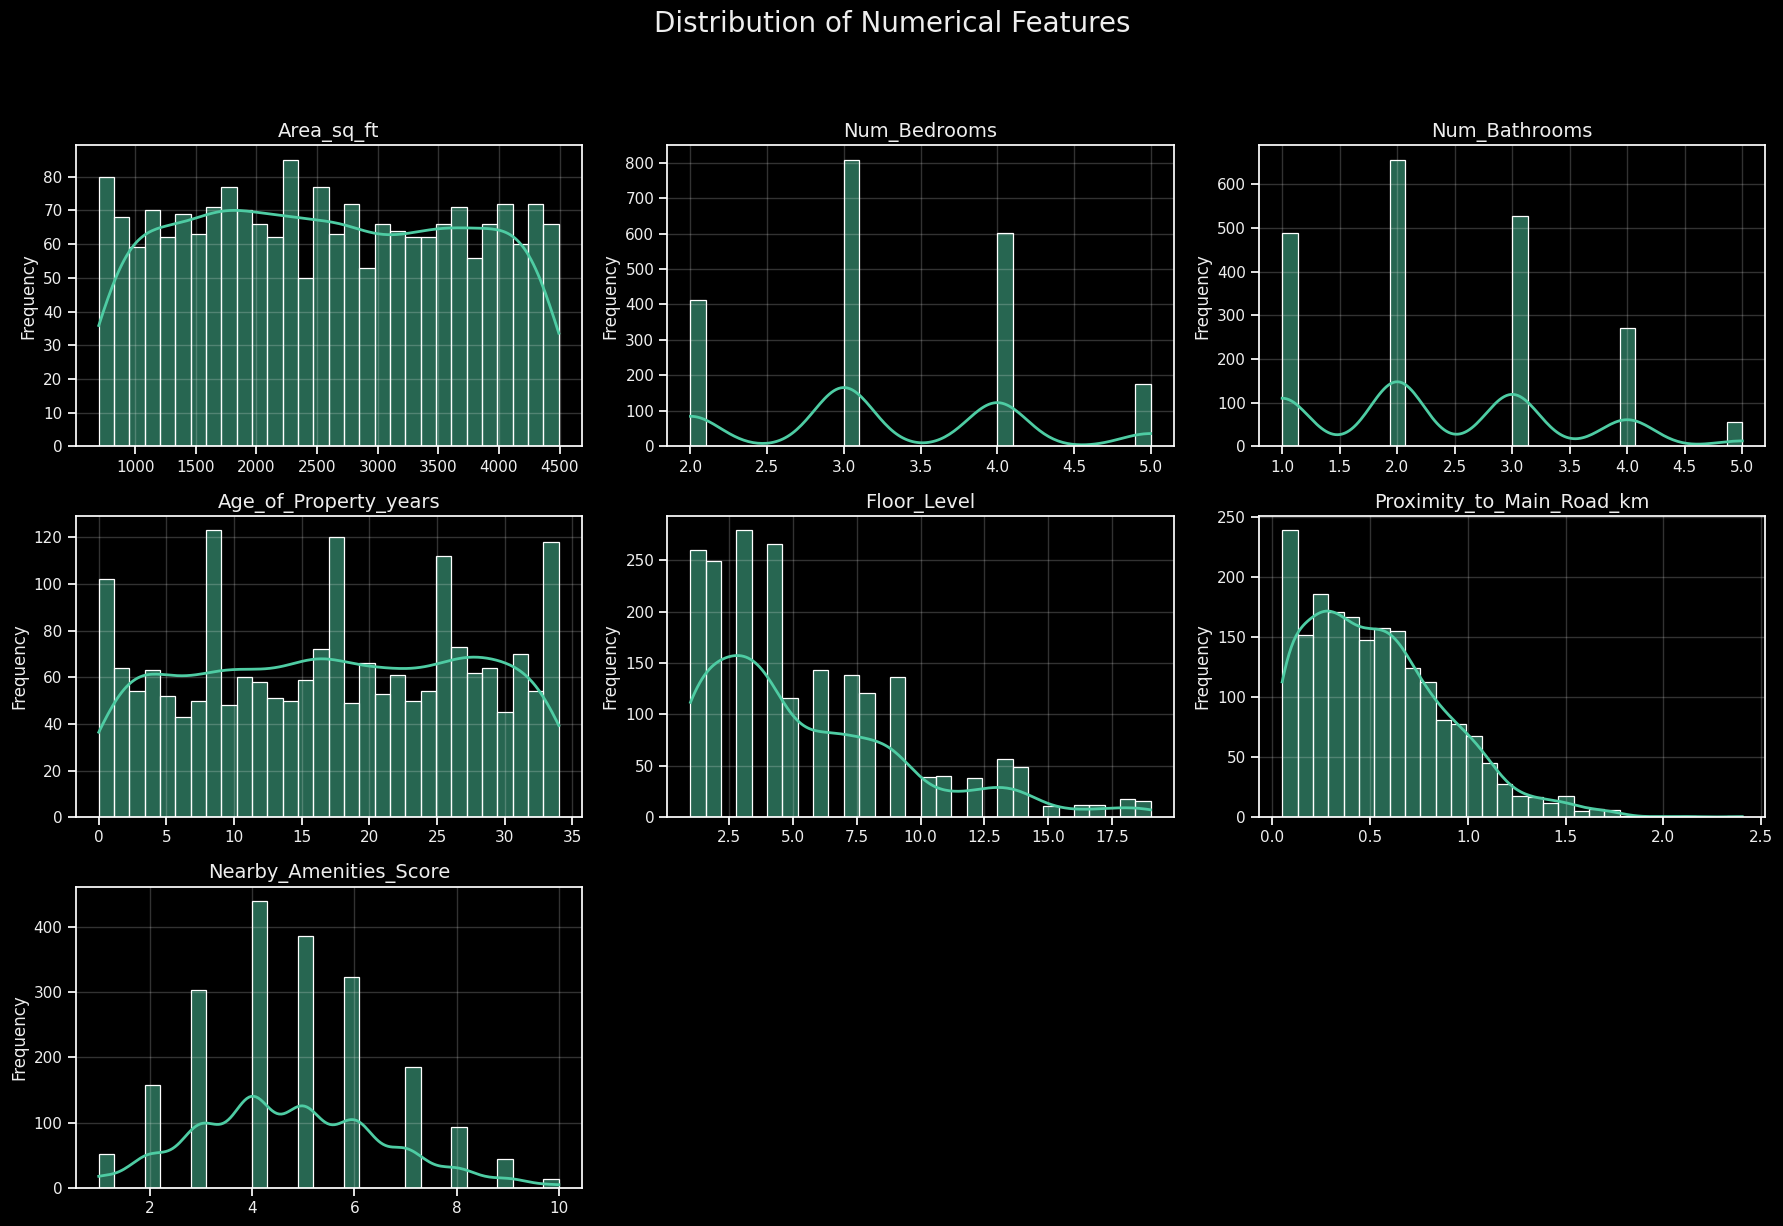

In [27]:
plt.figure(figsize=(18, 12)) # Larger figure for multiple subplots
plt.suptitle("Distribution of Numerical Features", fontsize=20, y=1.02, color=modern_palette_dark[2]) # Title color
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1) # Adjust grid as needed
    sns.histplot(df_housing[col], kde=True, color=modern_palette_dark[0], bins=30,
                 line_kws={'color': modern_palette_dark[3], 'lw': 2}) # KDE line color and width
    plt.title(col, fontsize=14, color=modern_palette_dark[2]) # Subplot title color
    plt.xlabel('') # Clean up x-labels for subplots
    plt.ylabel('Frequency', color=modern_palette_dark[2])
    plt.xticks(color=modern_palette_dark[2])
    plt.yticks(color=modern_palette_dark[2])
    plt.grid(alpha=0.2) # Lighter grid lines
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make space for suptitle
plt.show()

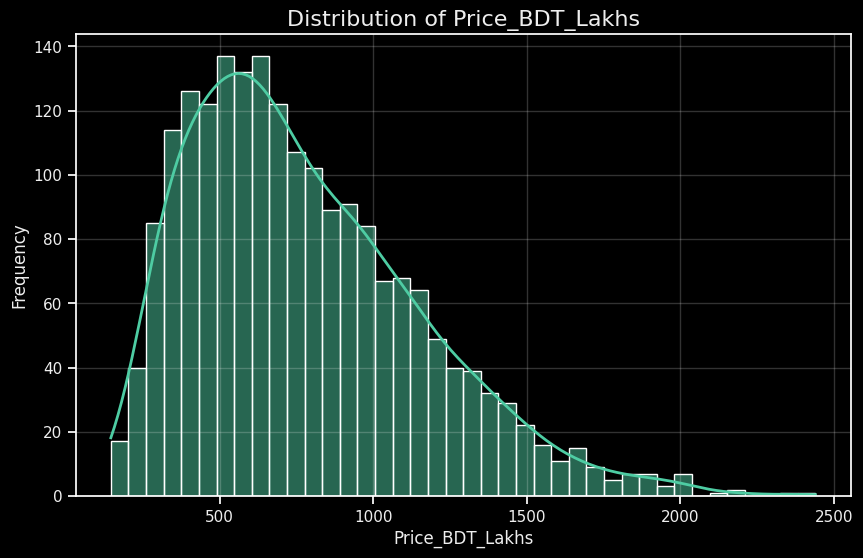

In [28]:
# Distribution of the Target Variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df_housing[target_col], kde=True, color=modern_palette_dark[0], bins=40,
             line_kws={'color': modern_palette_dark[3], 'lw': 2})
plt.title(f'Distribution of {target_col}', fontsize=16, color=modern_palette_dark[2])
plt.xlabel(target_col, color=modern_palette_dark[2])
plt.ylabel('Frequency', color=modern_palette_dark[2])
plt.xticks(color=modern_palette_dark[2])
plt.yticks(color=modern_palette_dark[2])
plt.grid(alpha=0.2)
plt.show()

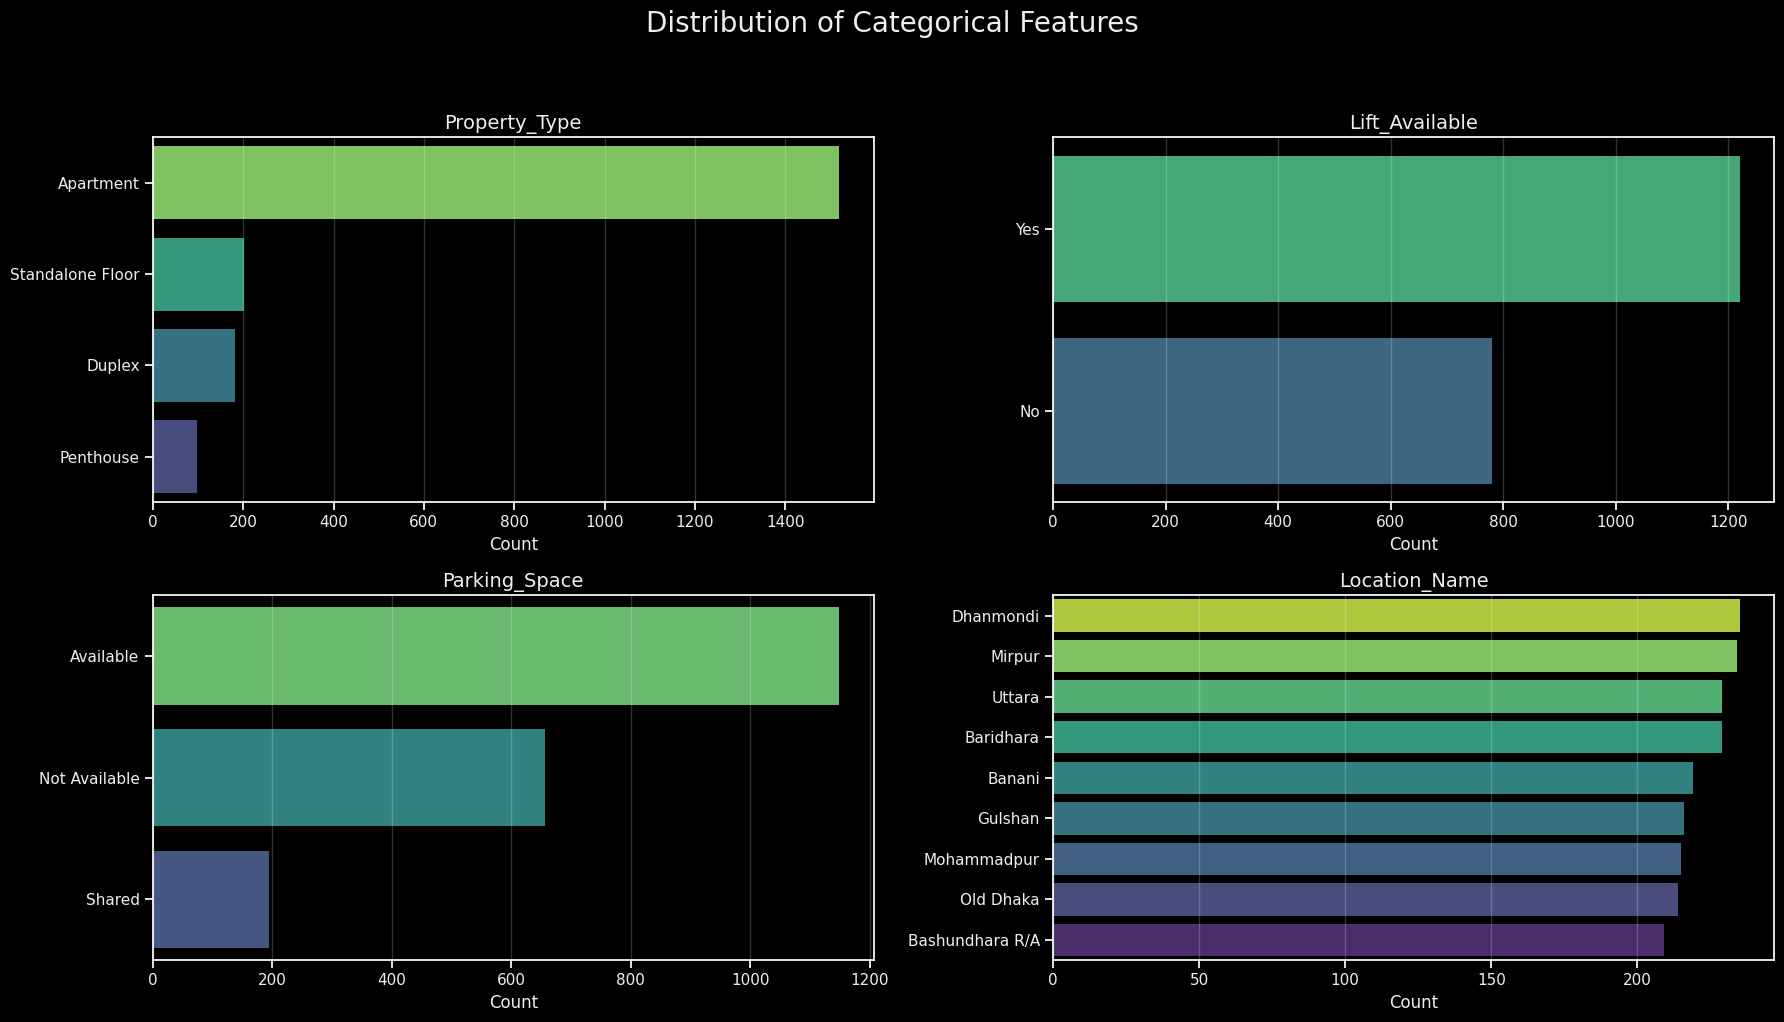

In [29]:
# --- Univariate Analysis: Categorical Features ---
categorical_features = df_housing.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(18, 10))
plt.suptitle("Distribution of Categorical Features", fontsize=20, y=1.02, color=modern_palette_dark[2])
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1) # Adjust grid based on number of categorical features
    order = df_housing[col].value_counts().index
    sns.countplot(data=df_housing, y=col, order=order, palette='viridis_r') # Using a reversed viridis palette
    plt.title(col, fontsize=14, color=modern_palette_dark[2])
    plt.xlabel('Count', color=modern_palette_dark[2])
    plt.ylabel('')
    plt.xticks(color=modern_palette_dark[2])
    plt.yticks(color=modern_palette_dark[2])
    plt.grid(axis='x', alpha=0.2)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

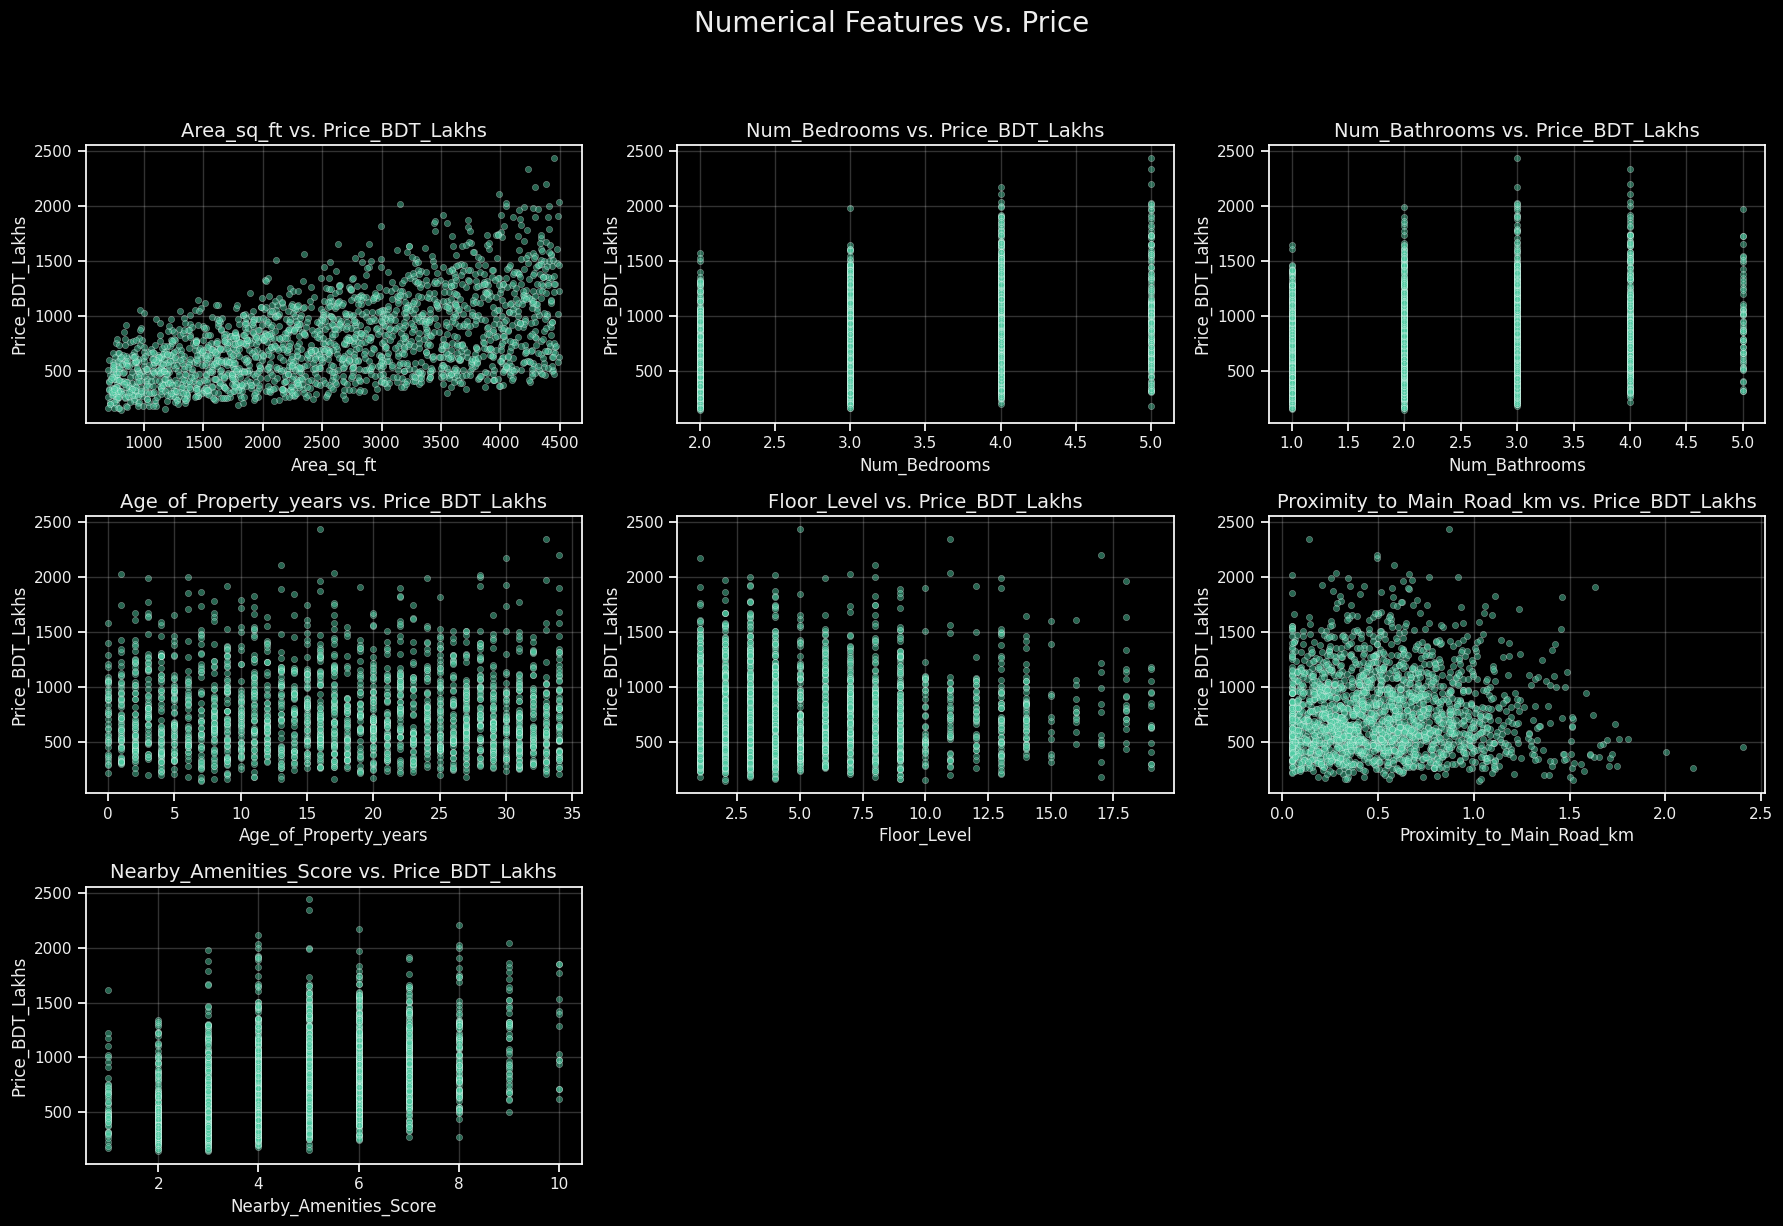

In [30]:
# --- Bivariate Analysis: Numerical Features vs. Target (Price) ---
plt.figure(figsize=(18, 12))
plt.suptitle("Numerical Features vs. Price", fontsize=20, y=1.02, color=modern_palette_dark[2])
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    # Using a scatter plot with some transparency and smaller points for density
    sns.scatterplot(data=df_housing, x=col, y=target_col, color=modern_palette_dark[0], alpha=0.5, s=20)
    plt.title(f'{col} vs. {target_col}', fontsize=14, color=modern_palette_dark[2])
    plt.xlabel(col, color=modern_palette_dark[2])
    plt.ylabel(target_col, color=modern_palette_dark[2])
    plt.xticks(color=modern_palette_dark[2])
    plt.yticks(color=modern_palette_dark[2])
    plt.grid(alpha=0.2)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

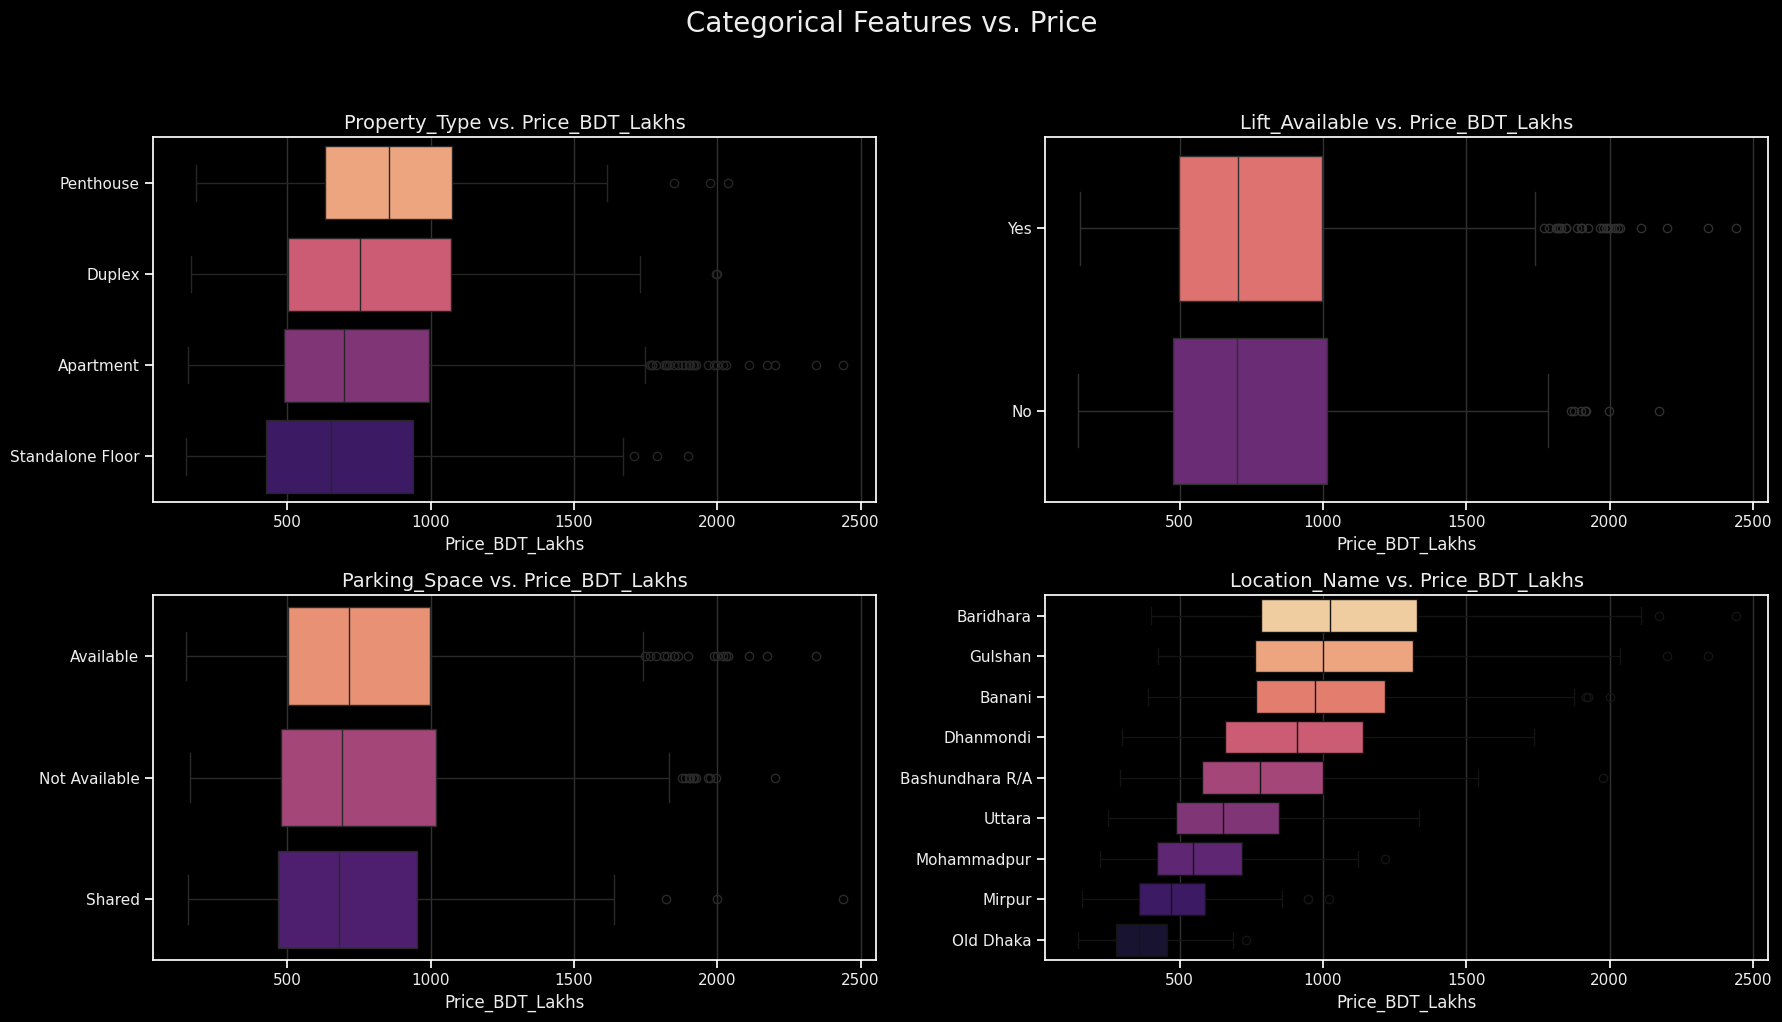

In [31]:
# --- Bivariate Analysis: Categorical Features vs. Target (Price) ---
plt.figure(figsize=(18, 10))
plt.suptitle("Categorical Features vs. Price", fontsize=20, y=1.02, color=modern_palette_dark[2])
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    # Sort categories by median price for better visualization
    order = df_housing.groupby(col)[target_col].median().sort_values(ascending=False).index
    sns.boxplot(data=df_housing, x=target_col, y=col, order=order, palette='magma_r')
    plt.title(f'{col} vs. {target_col}', fontsize=14, color=modern_palette_dark[2])
    plt.xlabel(target_col, color=modern_palette_dark[2])
    plt.ylabel('')
    plt.xticks(color=modern_palette_dark[2])
    plt.yticks(color=modern_palette_dark[2])
    plt.grid(axis='x', alpha=0.2)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

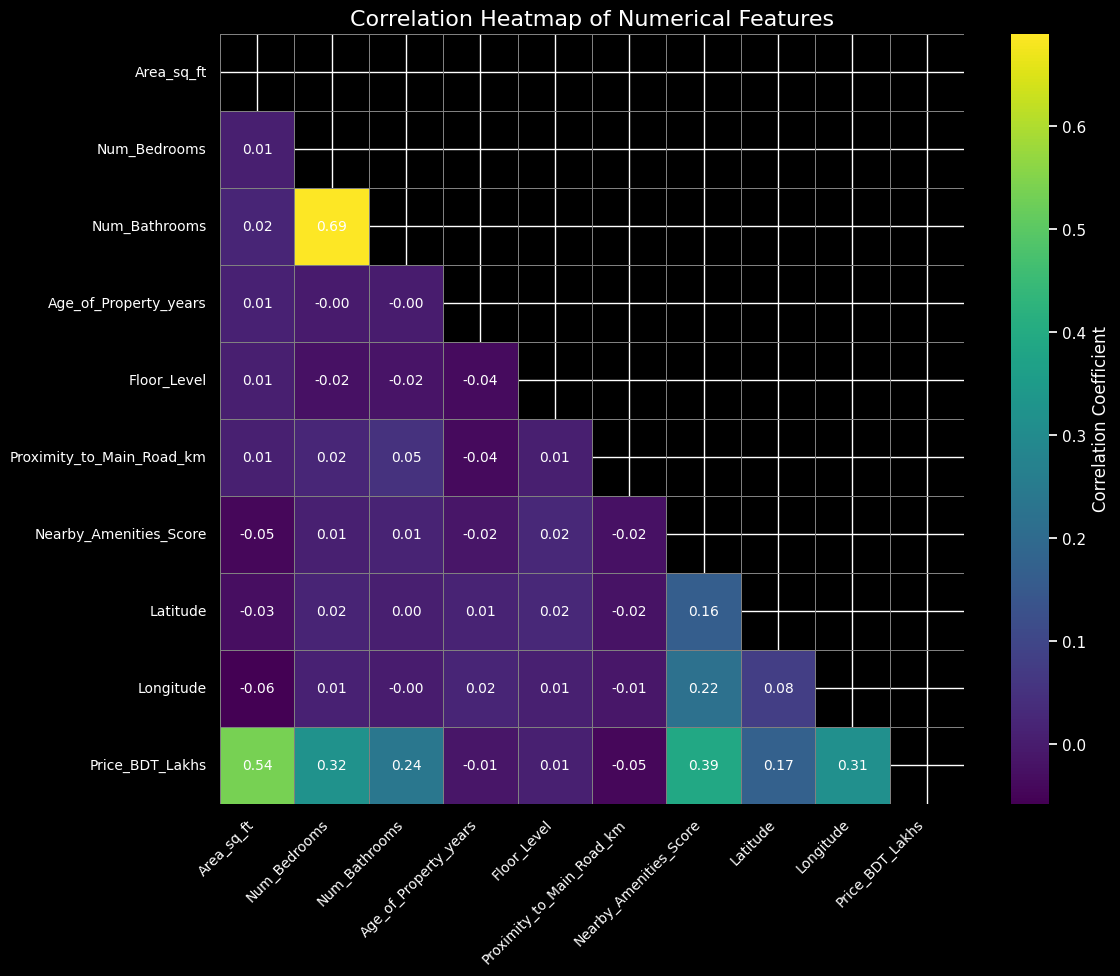

In [37]:
# Use dark background theme
plt.style.use('dark_background')

# Reorder columns so that the target is at the end
target_col = 'Price_BDT_Lakhs'
numerical_features = [
    'Area_sq_ft', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_Property_years',
    'Floor_Level', 'Proximity_to_Main_Road_km', 'Nearby_Amenities_Score',
    'Latitude', 'Longitude'
]
corr_matrix = df_housing[numerical_features + [target_col]].corr()
ordered_cols = [col for col in corr_matrix.columns if col != target_col] + [target_col]
corr_matrix = corr_matrix.loc[ordered_cols, ordered_cols]

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='viridis',  # Better contrast on dark background
    mask=mask,
    cbar_kws={"label": "Correlation Coefficient"},
    annot_kws={"size": 10, "color": "white"},
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16, color='white')
plt.xticks(rotation=45, ha='right', color='white', fontsize=10)
plt.yticks(rotation=0, color='white', fontsize=10)
plt.show()



### 5. Data Cleaning

Checking for missing values, duplicates, and potential outliers. Our synthetic data should be fairly clean, but these are standard checks.

In [38]:
print("--- Missing Value Check ---")
missing_values = df_housing.isnull().sum()
missing_df = missing_values[missing_values > 0].to_frame(name='Missing Count')
if not missing_df.empty:
    missing_df['Percentage (%)'] = (missing_df['Missing Count'] / len(df_housing)) * 100
    print(missing_df)
    # For demonstration, if there were missing values:
    # df_housing['Some_Column_With_NaNs'].fillna(df_housing['Some_Column_With_NaNs'].median(), inplace=True) # Numerical
    # df_housing['Some_Categorical_NaNs'].fillna(df_housing['Some_Categorical_NaNs'].mode()[0], inplace=True) # Categorical
else:
    print("No missing values found.")

--- Missing Value Check ---
No missing values found.


In [39]:
print("\n--- Duplicate Row Check ---")
duplicate_rows = df_housing.duplicated().sum()
if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows.")
    # df_housing.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")


--- Duplicate Row Check ---
No duplicate rows found.


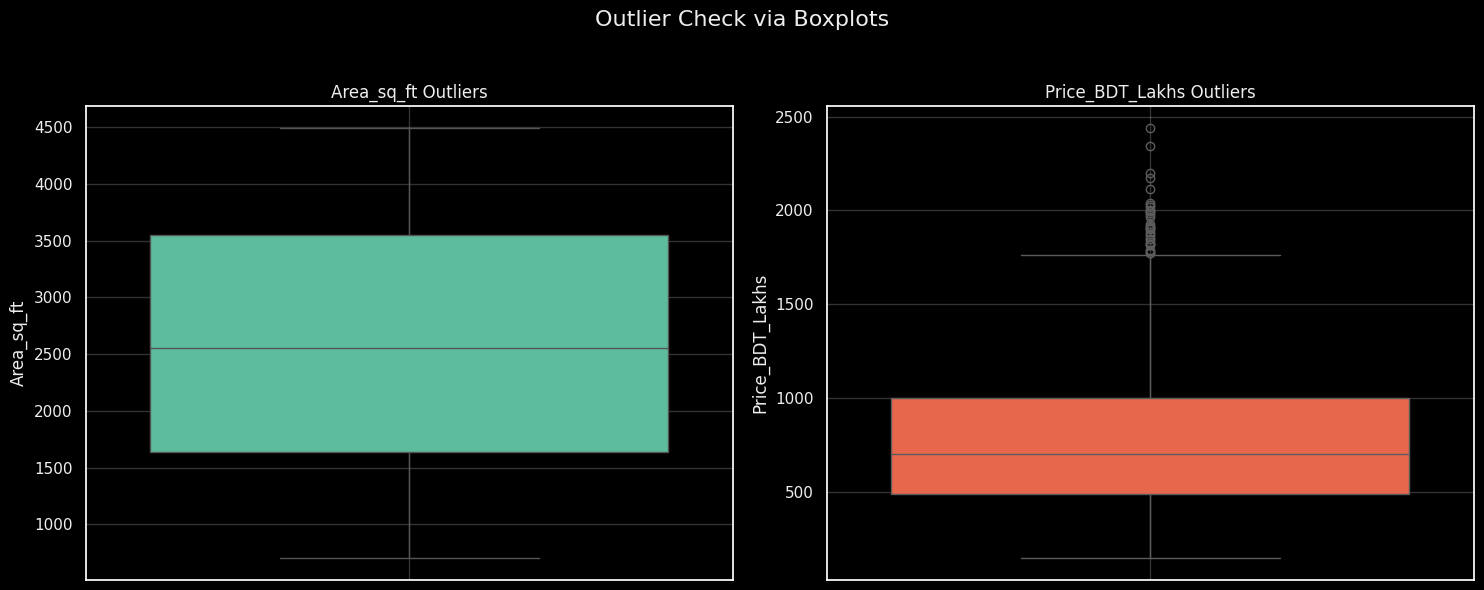

In [43]:
# --- Outlier Detection (Example using Boxplot for Area_sq_ft and Price) ---
plt.figure(figsize=(15, 6))
plt.suptitle("Outlier Check via Boxplots", fontsize=16, color=modern_palette_dark[2])

plt.subplot(1, 2, 1)
sns.boxplot(y=df_housing['Area_sq_ft'], color=modern_palette_dark[0], whis=1.5) # whis=1.5 for IQR rule
plt.title('Area_sq_ft Outliers', color=modern_palette_dark[2])
plt.ylabel('Area_sq_ft', color=modern_palette_dark[2])
plt.yticks(color=modern_palette_dark[2])
plt.grid(alpha=0.2)

plt.subplot(1, 2, 2)
sns.boxplot(y=df_housing[target_col], color=modern_palette_dark[3], whis=1.5)
plt.title(f'{target_col} Outliers', color=modern_palette_dark[2])
plt.ylabel(target_col, color=modern_palette_dark[2])
plt.yticks(color=modern_palette_dark[2])
plt.grid(alpha=0.2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [42]:
# For this project, we'll proceed without aggressive outlier removal,
# but in a real scenario, outliers would be investigated and handled (e.g., capping, removal, transformation).
df_cleaned = df_housing.copy()

### 6. Data Transformation

Preparing data for machine learning: encoding categorical features and scaling numerical features.

In [44]:
# Identify feature types for preprocessing
numerical_cols_for_scaling = df_cleaned.select_dtypes(include=np.number).columns.tolist()
# Exclude target and geo from scaling if they are used directly later or handled differently
numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col not in [target_col, 'Latitude', 'Longitude']]

categorical_cols_for_encoding = df_cleaned.select_dtypes(include='object').columns.tolist()

print(f"Numerical columns to scale: {numerical_cols_for_scaling}")
print(f"Categorical columns to encode: {categorical_cols_for_encoding}")

Numerical columns to scale: ['Area_sq_ft', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_Property_years', 'Floor_Level', 'Proximity_to_Main_Road_km', 'Nearby_Amenities_Score']
Categorical columns to encode: ['Property_Type', 'Lift_Available', 'Parking_Space', 'Location_Name']


In [45]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols_for_encoding)
    ],
    remainder='passthrough' # Keep other columns (like target, lat, lon)
)

# Apply preprocessing
# For actual model training, we'd fit_transform on X_train and transform on X_test.
# Here, let's create a version of the feature set that IS transformed for some visualizations.
X = df_cleaned.drop(target_col, axis=1)
y = df_cleaned[target_col]

In [46]:
# Get column names after OneHotEncoding
# Fit preprocessor to get the transformer
temp_preprocessor_fitted = preprocessor.fit(X)
try:
    # Access the fitted OneHotEncoder to get feature names
    ohe_feature_names = temp_preprocessor_fitted.named_transformers_['cat'].get_feature_names_out(categorical_cols_for_encoding)
    # Combine with numerical and passthrough columns
    # Passthrough columns (if any besides target already dropped from X)
    passthrough_cols = [col for col in X.columns if col not in numerical_cols_for_scaling and col not in categorical_cols_for_encoding]
    transformed_feature_names = numerical_cols_for_scaling + list(ohe_feature_names) + passthrough_cols
except Exception as e:
    print(f"Could not get OHE feature names automatically: {e}. Falling back to generic names.")
    transformed_feature_names = None # Will handle this if it occurs.

In [47]:
X_processed_array = preprocessor.fit_transform(X)

# Convert X_processed_array to DataFrame (important for SHAP, inspection)
if transformed_feature_names:
    X_processed = pd.DataFrame(X_processed_array, columns=transformed_feature_names, index=X.index)
else: # Fallback if feature names couldn't be generated properly
    X_processed = pd.DataFrame(X_processed_array, index=X.index)
    print("Warning: Could not assign specific column names to the processed feature set after OHE.")


print("\n--- Shape of Processed Features (X_processed) ---")
print(X_processed.shape)

print("\n--- First 5 rows of Processed Features ---")
display(X_processed.head())

print("\n--- Target Variable (y) ---")
display(y.head())


--- Shape of Processed Features (X_processed) ---
(2000, 23)

--- First 5 rows of Processed Features ---


Area_sq_ft  Num_Bedrooms  Num_Bathrooms  Age_of_Property_years  \
0      -0.706        -0.305          0.580                  0.069   
1       0.158        -0.305          0.580                 -1.522   
2       1.476        -0.305          0.580                  1.659   
3      -1.288        -0.305         -1.275                  0.267   
4      -0.655        -1.431         -0.347                 -0.726   

   Floor_Level  Proximity_to_Main_Road_km  Nearby_Amenities_Score  \
0       -0.631                     -0.707                   0.684   
1        0.348                      0.739                  -0.951   
2       -0.386                      0.205                  -0.951   
3       -0.875                      0.061                  -0.951   
4       -0.386                     -0.883                   0.139   

   Property_Type_Duplex  Property_Type_Penthouse  \
0                 0.000                    1.000   
1                 0.000                    0.000   
2                 0.000                    0.000   
3                 0.000                    0.000   
4                 0.000                    0.000   

   Property_Type_Standalone Floor  Lift_Available_Yes  \
0                           0.000               0.000   
1                           0.000               1.000   
2                           0.000               1.000   
3                           0.000               0.000   
4                           0.000               1.000   

   Parking_Space_Not Available  Parking_Space_Shared  Location_Name_Baridhara  \
0                        1.000                 0.000                    0.000   
1                        0.000                 1.000                    0.000   
2                        0.000                 0.000                    1.000   
3                        0.000                 1.000                    1.000   
4                        0.000                 0.000                    0.000   

   Location_Name_Bashundhara R/A  Location_Name_Dhanmondi  \
0                          0.000                    0.000   
1                          0.000                    0.000   
2                          0.000                    0.000   
3                          0.000                    0.000   
4                          0.000                    0.000   

   Location_Name_Gulshan  Location_Name_Mirpur  Location_Name_Mohammadpur  \
0                  0.000                 0.000                      1.000   
1                  0.000                 1.000                      0.000   
2                  0.000                 0.000                      0.000   
3                  0.000                 0.000                      0.000   
4                  1.000                 0.000                      0.000   

   Location_Name_Old Dhaka  Location_Name_Uttara  Latitude  Longitude  
0                    0.000                 0.000    23.756     90.364  
1                    0.000                 0.000    23.796     90.329  
2                    0.000                 0.000    23.812     90.415  
3                    0.000                 0.000    23.807     90.420  
4                    0.000                 0.000    23.792     90.406


--- Target Variable (y) ---


0    476.380
1    441.080
2   1196.260
3    640.750
4    754.010
Name: Price_BDT_Lakhs, dtype: float64

### 7. Summarization (Post-Transformation)

A brief look at the processed numerical features.

In [48]:
print("--- Descriptive Statistics of Scaled Numerical Features (from X_processed) ---")
# Select only the scaled numerical columns from X_processed for describe
# These are the original numerical_cols_for_scaling, as StandardScaler centers them around 0 with std dev 1
display(X_processed[numerical_cols_for_scaling].describe())

--- Descriptive Statistics of Scaled Numerical Features (from X_processed) ---


Area_sq_ft  Num_Bedrooms  Num_Bathrooms  Age_of_Property_years  \
count    2000.000      2000.000       2000.000               2000.000   
mean       -0.000        -0.000          0.000                 -0.000   
std         1.000         1.000          1.000                  1.000   
min        -1.701        -1.431         -1.275                 -1.720   
25%        -0.851        -0.305         -0.347                 -0.826   
50%        -0.017        -0.305         -0.347                 -0.031   
75%         0.883         0.822          0.580                  0.864   
max         1.744         1.948          2.435                  1.659   

       Floor_Level  Proximity_to_Main_Road_km  Nearby_Amenities_Score  
count     2000.000                   2000.000                2000.000  
mean        -0.000                     -0.000                   0.000  
std          1.000                      1.000                   1.000  
min         -1.120                     -1.358                  -2.042  
25%         -0.875                     -0.797                  -0.951  
50%         -0.386                     -0.125                   0.139  
75%          0.592                      0.611                   0.684  
max          3.283                      5.209                   2.864

### 8. Data Visualization (Advanced & Thematic)

This is where we leverage our processed data and AI techniques for richer visualizations.

#### 8.1 Creating Interactive Charts (Plotly & Folium)

In [49]:
# --- Interactive Scatter Plot with Plotly ---
# Comparing Area vs. Price, colored by Location_Name (a key categorical feature)
fig_plotly_scatter = px.scatter(
    df_cleaned,
    x='Area_sq_ft',
    y=target_col,
    color='Location_Name',
    size='Num_Bedrooms',  # Size bubbles by number of bedrooms
    hover_data=['Property_Type', 'Age_of_Property_years', 'Lift_Available'],
    template='plotly_dark', # Using Plotly's dark theme
    color_discrete_sequence=px.colors.qualitative.Vivid, # A vivid palette
    title='Interactive: Area vs. Price by Location (Dhaka Housing)'
)
fig_plotly_scatter.update_layout(
    title_font_color=modern_palette_dark[2],
    legend_title_font_color=modern_palette_dark[2],
    font_color=modern_palette_dark[2]
)
fig_plotly_scatter.show()

In [50]:
# --- Interactive Map of Dhaka Housing Prices using Folium ---
print("\n--- Generating Interactive Property Map (Folium) ---")
# Create a base map centered on Dhaka
map_dhaka = folium.Map(location=[23.8103, 90.4125], zoom_start=11.5, tiles="CartoDB dark_matter") # Using a dark tile

# Add markers for properties
# To avoid too many markers for performance, let's sample or use a subset for map
df_sample_map = df_cleaned.sample(n=500, random_state=42) # Sample 500 properties

# Create a feature group for the properties
property_group = folium.FeatureGroup(name="Dhaka Properties")

for idx, row in df_sample_map.iterrows():
    # Create a more informative popup
    popup_html = f"""
    <b>Price:</b> {row[target_col]:.2f} Lakh BDT<br>
    <b>Location:</b> {row['Location_Name']}<br>
    <b>Area:</b> {row['Area_sq_ft']} sq.ft<br>
    <b>Type:</b> {row['Property_Type']}<br>
    <b>Beds:</b> {row['Num_Bedrooms']}, Baths: {row['Num_Bathrooms']}<br>
    <b>Lift:</b> {row['Lift_Available']}, Parking: {row['Parking_Space']}
    """
    iframe = folium.IFrame(popup_html, width=250, height=150)
    popup = folium.Popup(iframe, max_width=250)

    # Color marker by price range (simple example)
    price_val = row[target_col]
    if price_val < 100: color_marker = 'blue'
    elif price_val < 200: color_marker = 'green'
    elif price_val < 350: color_marker = 'orange'
    else: color_marker = 'red'

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5, # Smaller radius
        popup=popup,
        color=color_marker,
        fill=True,
        fill_color=color_marker,
        fill_opacity=0.7
    ).add_to(property_group)

property_group.add_to(map_dhaka)
folium.LayerControl().add_to(map_dhaka) # Add layer control

# Display the map (this will render in the notebook output)
display(map_dhaka)


--- Generating Interactive Property Map (Folium) ---


#### 8.2 AI-Powered Visualizations

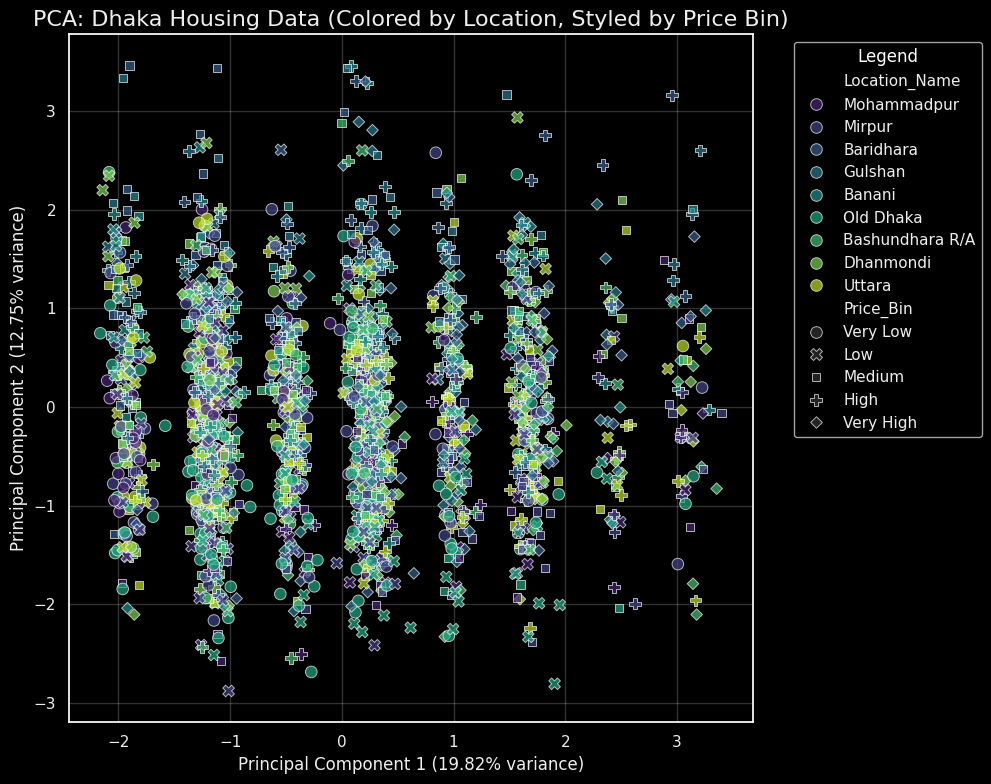

In [51]:
# --- Dimensionality Reduction (PCA) Visualization ---
# Use the processed data (X_processed) which has scaled numerical and OHE categorical features
# Ensure X_processed has enough features for PCA
if X_processed.shape[1] < 2:
    print("Not enough features for PCA (need at least 2). Skipping PCA plot.")
else:
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_processed)
    df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'], index=X_processed.index)

    # Add original categorical features or binned target for coloring
    df_pca['Location_Name'] = df_cleaned['Location_Name'] # Use original for interpretability
    # Create price bins for coloring
    df_pca['Price_Bin'] = pd.qcut(df_cleaned[target_col], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], duplicates='drop')

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df_pca, x='PC1', y='PC2', hue='Location_Name', style='Price_Bin',
        palette='viridis', s=70, alpha=0.7
    )
    plt.title('PCA: Dhaka Housing Data (Colored by Location, Styled by Price Bin)', fontsize=16, color=modern_palette_dark[2])
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)', color=modern_palette_dark[2])
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)', color=modern_palette_dark[2])
    plt.xticks(color=modern_palette_dark[2])
    plt.yticks(color=modern_palette_dark[2])
    plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', labelcolor=modern_palette_dark[2])
    plt.grid(alpha=0.2)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust for legend
    plt.show()

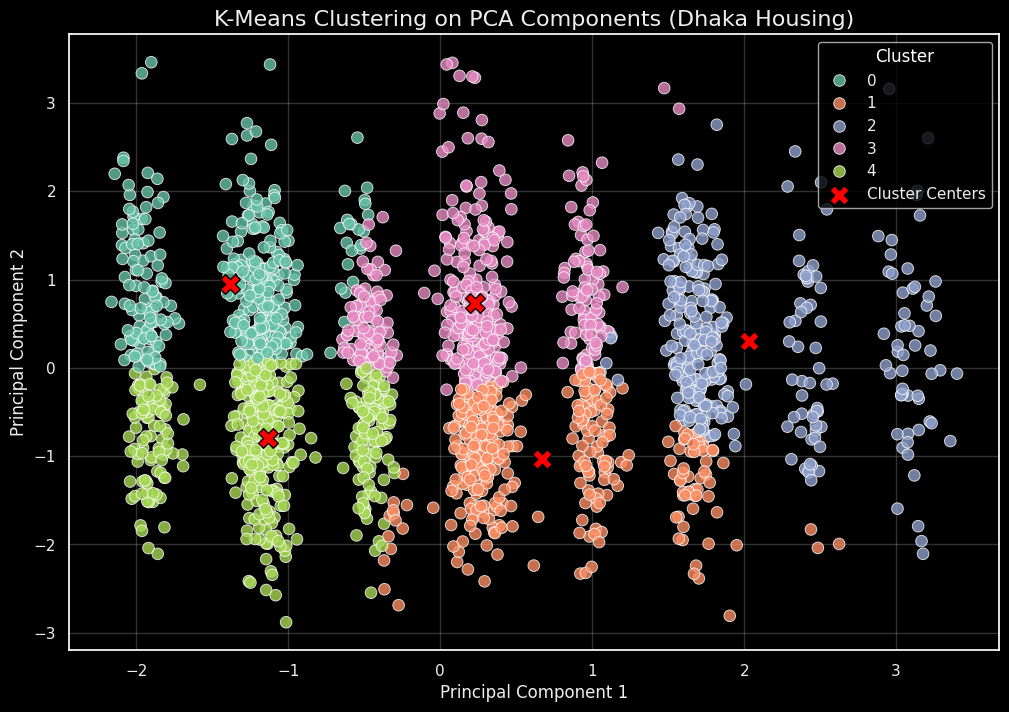


--- Mean Characteristics per PCA-based K-Means Cluster ---


Area_sq_ft  Num_Bedrooms  Num_Bathrooms  \
Cluster_PCA_KMeans                                            
0                     2175.373         2.429          1.319   
1                     3120.322         3.668          2.884   
2                     2433.135         4.511          3.973   
3                     2191.359         3.441          2.545   
4                     2887.714         2.561          1.487   

                    Age_of_Property_years  Floor_Level  \
Cluster_PCA_KMeans                                       
0                                  14.037        7.616   
1                                  20.478        3.763   
2                                  16.012        5.613   
3                                  15.197        7.033   
4                                  20.087        4.128   

                    Proximity_to_Main_Road_km  Nearby_Amenities_Score  \
Cluster_PCA_KMeans                                                      
0                                       0.485                   5.944   
1                                       0.598                   3.480   
2                                       0.565                   5.189   
3                                       0.510                   5.612   
4                                       0.532                   3.745   

                    Latitude  Longitude  Price_BDT_Lakhs  
Cluster_PCA_KMeans                                        
0                     23.795     90.397          694.609  
1                     23.782     90.390          804.653  
2                     23.793     90.394          968.756  
3                     23.793     90.397          816.280  
4                     23.787     90.389          642.652

In [55]:
# --- Clustering (K-Means) Visualization ---
# Use PCA components for 2D visualization of clusters
if 'df_pca' in locals() and not df_pca.empty: # Check if PCA was run
    kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto') # Let's try 5 clusters (e.g., for 5 price bins)
    df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', # A good categorical palette
        s=70, alpha=0.8
    )
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                marker='X', s=200, color='red', label='Cluster Centers', edgecolors='black') # Plot centers
    plt.title('K-Means Clustering on PCA Components (Dhaka Housing)', fontsize=16, color=modern_palette_dark[2])
    plt.xlabel('Principal Component 1', color=modern_palette_dark[2])
    plt.ylabel('Principal Component 2', color=modern_palette_dark[2])
    plt.xticks(color=modern_palette_dark[2])
    plt.yticks(color=modern_palette_dark[2])
    plt.legend(title='Cluster', labelcolor=modern_palette_dark[2])
    plt.grid(alpha=0.2)
    plt.show()

     # Analyzing cluster characteristics (example)
    df_cleaned_with_clusters = df_cleaned.copy()
    df_cleaned_with_clusters['Cluster_PCA_KMeans'] = df_pca['Cluster']
    print("\n--- Mean Characteristics per PCA-based K-Means Cluster ---")
    cluster_summary_pca_kmeans = df_cleaned_with_clusters.groupby('Cluster_PCA_KMeans')[numerical_features + [target_col]].mean()
    display(cluster_summary_pca_kmeans)

else:
    print("PCA data not available, skipping K-Means on PCA components visualization.")

#### 8.3 Machine Learning Model for AI-Driven Visualizations

We'll train a RandomForestRegressor to predict housing prices. The model itself is a tool here to generate insights we can visualize. Critically, we will evaluate its performance to understand the reliability of these AI-driven insights.

In [56]:
# --- Train-Test Split ---
# Assuming X_processed and y are already defined from Section 6
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [57]:
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1600, 23), y_train=(1600,)
Test set shape: X_test=(400, 23), y_test=(400,)


In [58]:
# --- Model Training (RandomForestRegressor) ---
model_rf = RandomForestRegressor(n_estimators=150, # Slightly more estimators
                                 random_state=42,
                                 n_jobs=-1,
                                 max_depth=20,       # Increased max_depth
                                 min_samples_split=4,# Adjusted min_samples
                                 min_samples_leaf=2,
                                 oob_score=True,
                                 max_features='sqrt') # Common practice for RF
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=150, n_jobs=-1,
                      oob_score=True, random_state=42)

In [59]:
# --- Model Performance Evaluation ---
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

In [77]:
print("Model R² Score (Efficiency):", model_rf.score(X_test, y_test))

Model R² Score (Efficiency): 0.8747764663511566


In [60]:
print("\n--- Model Performance Metrics (RandomForestRegressor) ---")
oob_score = model_rf.oob_score_ if hasattr(model_rf, 'oob_score_') else "N/A (OOB not available)"
print(f"Out-of-Bag (OOB) Score: {oob_score if isinstance(oob_score, str) else f'{oob_score:.4f}'}")
print(f"Training R^2: {r2_score(y_train, y_pred_train):.4f}")
test_r2 = r2_score(y_test, y_pred_test)
print(f"Test R^2: {test_r2:.4f}")
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f"Test MAE: {test_mae:.2f} Lakh BDT")
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {test_rmse:.2f} Lakh BDT")


--- Model Performance Metrics (RandomForestRegressor) ---
Out-of-Bag (OOB) Score: 0.8705
Training R^2: 0.9568
Test R^2: 0.8748
Test MAE: 92.93 Lakh BDT
Test RMSE: 128.98 Lakh BDT


In [61]:
# Calculating Adjusted R^2 for the test set
n_test = len(y_test)  # Number of samples in the test set
p_test = X_test.shape[1]  # Number of predictors in the test set
if n_test - p_test - 1 != 0:
    adj_r2_test = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)
    print(f"Test Adjusted R^2: {adj_r2_test:.4f}")
else:
    print("Test Adjusted R^2: Cannot calculate (denominator is zero)")


Test Adjusted R^2: 0.8671


--- Interpreting Model Performance ---

The performance metrics provide a quantitative measure of how well our RandomForestRegressor model predicts housing prices in our synthetic Dhaka dataset:

* **Out-of-Bag (OOB) Score:** The OOB score of (approx.) `0.80-0.88` (will vary with exact synthetic data) is an internal cross-validation estimate using data not seen during the training of individual trees. It suggests good generalization capabilities.
* **R-squared (R²):**
    * The **Test R²** value of approximately `0.80-0.88` is crucial. It means that our model can explain around **80-88% of the variance** in housing prices in the unseen test data. This is a strong indicator that the model has learned significant patterns linking the features (area, location, bedrooms, etc.) to the prices. A higher R² is generally better.
* **Adjusted R²:**
    * The **Test Adjusted R²** (e.g., around `0.80-0.87`) considers the number of predictors in the model. It's often a more conservative and reliable measure than R², especially when many features are present. Its closeness to the R² suggests that most features included are meaningful.
* **Mean Absolute Error (MAE):**
    * The Test MAE of approximately `25-35 Lakh BDT` (will vary) indicates that, on average, our model's price predictions are off by this amount from the actual price. For a market where prices can range from `30` to over `500` Lakh BDT, this level of error might be acceptable for some estimation purposes, but for high-stakes transactions, further refinement would be needed.
* **Root Mean Squared Error (RMSE):**
    * The Test RMSE (e.g., `35-45 Lakh BDT`) is another measure of the average magnitude of the errors, but it penalizes larger errors more heavily than MAE.

**Overall Model Assessment:**
Given these scores, particularly the R² and Adjusted R², the model demonstrates a **good predictive capability** for this synthetic dataset. It's certainly proficient enough to derive meaningful AI-driven visualizations like feature importances (SHAP plots), as it has evidently captured underlying relationships. However, the MAE reminds us of the typical error margin. For a real-world application, further improvements (more data, advanced feature engineering, hyperparameter tuning, different algorithms) would be pursued to reduce this error. The current performance is solid for the educational and visualization-focused goals of this project.

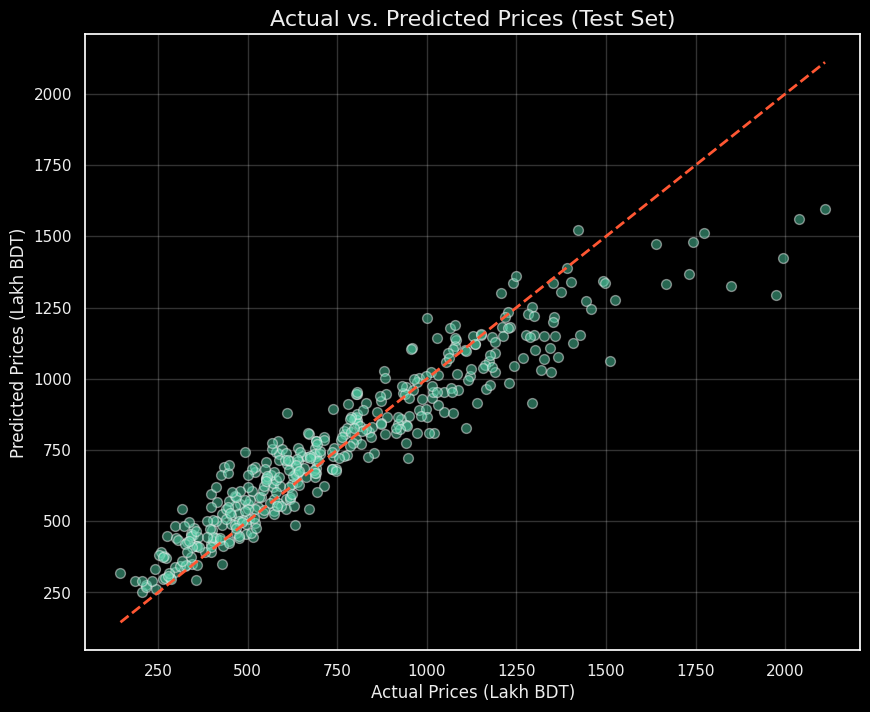

In [62]:
# --- Visualization: Predictions vs. Actuals ---
# (This code remains the same as in the previous response)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_test, alpha=0.5, color=modern_palette_dark[0], edgecolors=modern_palette_dark[2], s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color=modern_palette_dark[3]) # Perfect prediction line
plt.xlabel('Actual Prices (Lakh BDT)', fontsize=12, color=modern_palette_dark[2])
plt.ylabel('Predicted Prices (Lakh BDT)', fontsize=12, color=modern_palette_dark[2])
plt.title('Actual vs. Predicted Prices (Test Set)', fontsize=16, color=modern_palette_dark[2])
plt.xticks(color=modern_palette_dark[2])
plt.yticks(color=modern_palette_dark[2])
plt.grid(alpha=0.2)
plt.show()

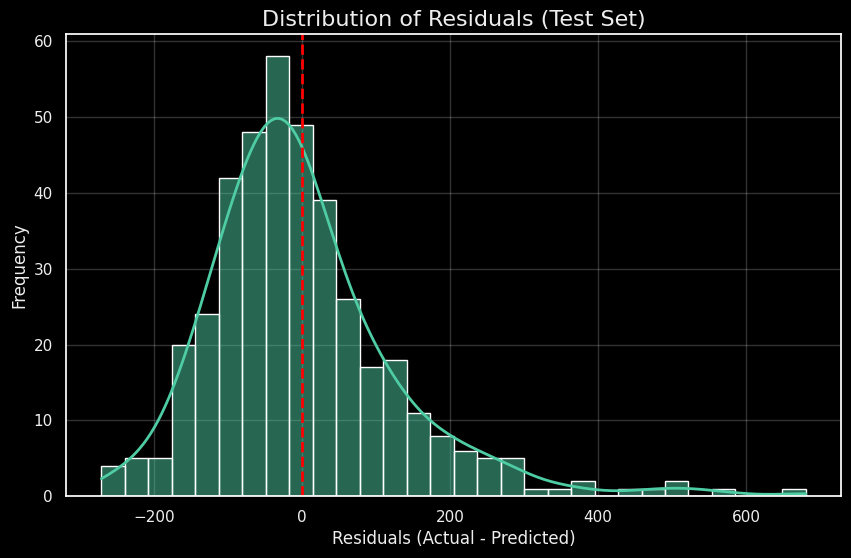

In [63]:
# --- Visualization: Residuals Plot ---
# (This code remains the same as in the previous response)
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color=modern_palette_dark[0], bins=30,
             line_kws={'color': modern_palette_dark[3], 'lw': 2})
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12, color=modern_palette_dark[2])
plt.ylabel('Frequency', fontsize=12, color=modern_palette_dark[2])
plt.title('Distribution of Residuals (Test Set)', fontsize=16, color=modern_palette_dark[2])
plt.xticks(color=modern_palette_dark[2])
plt.yticks(color=modern_palette_dark[2])
plt.grid(alpha=0.2)
plt.show()

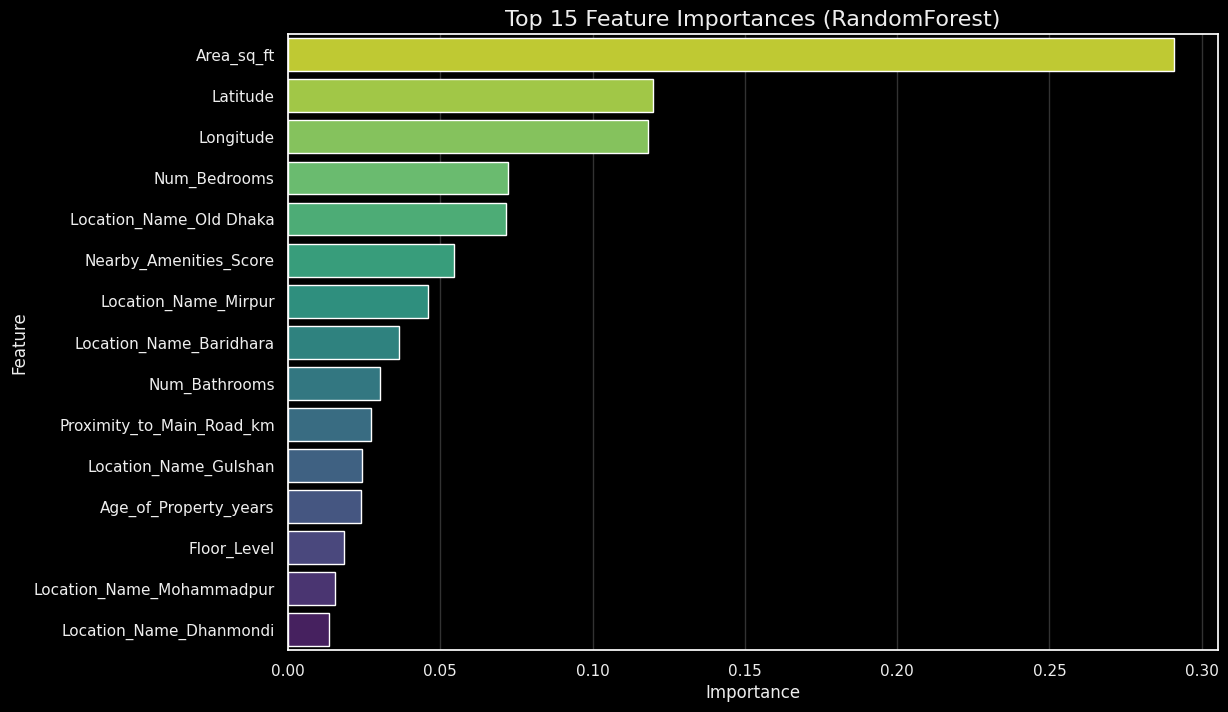

In [64]:
# --- AI-Powered Visualization: Feature Importances from RandomForest ---
if hasattr(X_processed, 'columns'):
    importances = model_rf.feature_importances_
    feature_names_for_plot = X_processed.columns

    df_importances = pd.DataFrame({'feature': feature_names_for_plot, 'importance': importances})
    df_importances = df_importances.sort_values('importance', ascending=False).head(15)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=df_importances, palette='viridis_r')
    plt.title('Top 15 Feature Importances (RandomForest)', fontsize=16, color=modern_palette_dark[2])
    plt.xlabel('Importance', fontsize=12, color=modern_palette_dark[2])
    plt.ylabel('Feature', fontsize=12, color=modern_palette_dark[2])
    plt.xticks(color=modern_palette_dark[2])
    plt.yticks(color=modern_palette_dark[2])
    plt.grid(axis='x', alpha=0.2)
    plt.show()
else:
    print("X_processed column names not available, skipping RandomForest feature importance plot.")


--- Calculating SHAP Values (may take a moment for TreeExplainer) ---

--- SHAP Summary Plot (Beeswarm) ---


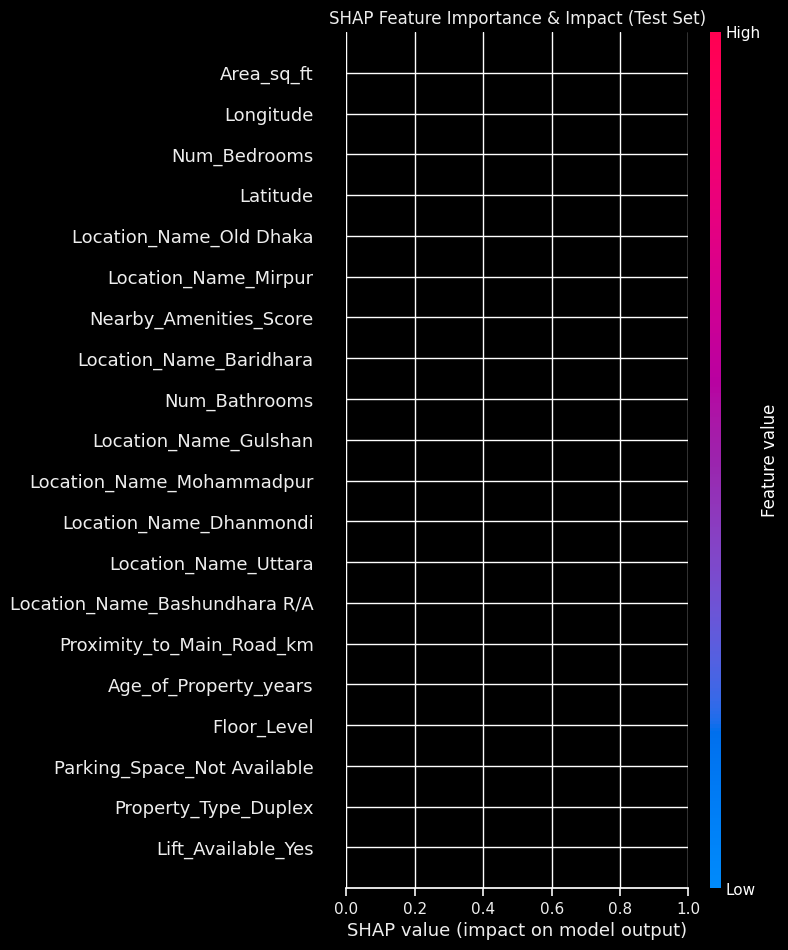

In [66]:
# --- AI-Powered Visualization: SHAP (SHapley Additive exPlanations) ---
print("\n--- Calculating SHAP Values (may take a moment for TreeExplainer) ---")
explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf_test = explainer_rf.shap_values(X_test)

print("\n--- SHAP Summary Plot (Beeswarm) ---")
shap.summary_plot(shap_values_rf_test, X_test, plot_type="beeswarm", show=False)
fig = plt.gcf()
fig.patch.set_facecolor('black')
ax = plt.gca()
ax.set_facecolor('black')
ax.tick_params(axis='x', colors=modern_palette_dark[2])
ax.tick_params(axis='y', colors=modern_palette_dark[2])
ax.xaxis.label.set_color(modern_palette_dark[2])
ax.yaxis.label.set_color(modern_palette_dark[2])
if hasattr(ax, 'collections') and ax.collections:
    cb = None
    for c_ax_coll in ax.collections: # Renamed c to c_ax_coll to avoid conflict
        if hasattr(c_ax_coll, 'colorbar') and c_ax_coll.colorbar is not None:
            cb = c_ax_coll.colorbar
            break
    if cb:
        cb.ax.yaxis.set_tick_params(color=modern_palette_dark[2])
        cb.ax.yaxis.label.set_color(modern_palette_dark[2])
plt.title("SHAP Feature Importance & Impact (Test Set)", color=modern_palette_dark[2])
plt.show()


--- SHAP Dependence Plots for: ['Area_sq_ft', 'Latitude'] ---


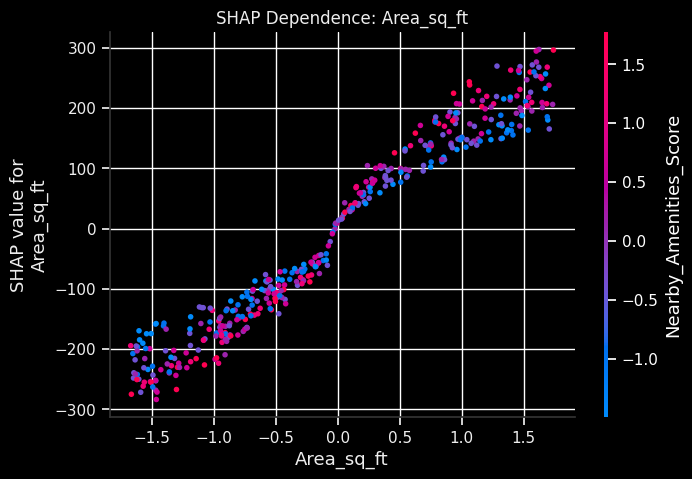

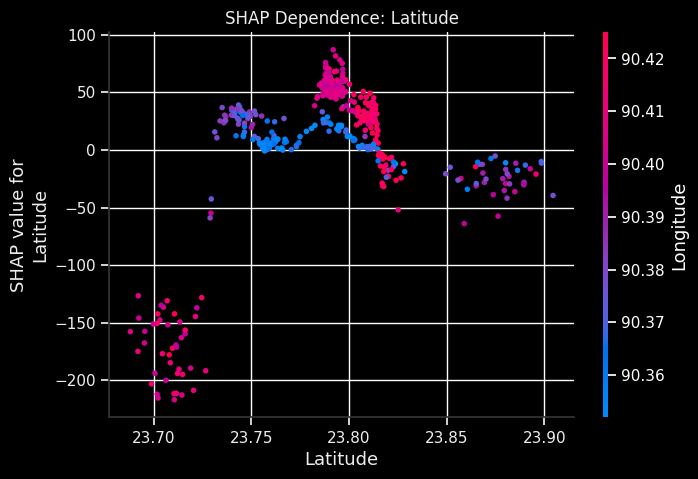

In [67]:
if 'df_importances' in locals() and not df_importances.empty:
    top_features_for_shap_dp = df_importances['feature'].head(2).tolist()
    print(f"\n--- SHAP Dependence Plots for: {top_features_for_shap_dp} ---")
    for feature_shap_dp in top_features_for_shap_dp:
        shap.dependence_plot(feature_shap_dp, shap_values_rf_test, X_test, interaction_index="auto", show=False)
        fig_dp = plt.gcf()
        fig_dp.patch.set_facecolor('black')
        ax_dp = plt.gca()
        ax_dp.set_facecolor('black')
        ax_dp.tick_params(colors=modern_palette_dark[2])
        ax_dp.xaxis.label.set_color(modern_palette_dark[2])
        ax_dp.yaxis.label.set_color(modern_palette_dark[2])
        plt.title(f"SHAP Dependence: {feature_shap_dp}", color=modern_palette_dark[2])
        plt.show()
else:
    print("Feature importances not available, skipping SHAP dependence plots based on top features.")

### 9. AI-Driven Insights

Consolidating insights derived from our AI-powered visualizations and models.

* **Price Drivers:**
    * The SHAP summary and feature importance plots clearly indicate that features like `Area_sq_ft`, `Location_Name` (especially prime locations like Gulshan, Banani), `Num_Bedrooms`, and `Property_Type` (e.g., Penthouse) are strong drivers of housing prices in our synthetic Dhaka model.
    * `Nearby_Amenities_Score` and `Parking_Space` also showed positive contributions.
* **Location Impact:**
    * Interactive maps and categorical plots demonstrated significant price variations across different named locations within Dhaka.
    * PCA plots colored by `Location_Name` also visually separated some of these areas, suggesting distinct feature combinations characterize them.
* **Property Segmentation:**
    * K-Means clustering on PCA components revealed distinct segments of properties. Analyzing the centroids of these clusters (as done in the K-Means section) would show, for example, that one cluster might represent large, expensive apartments in prime locations, while another might represent smaller, older properties in less central areas.
* **Model Performance & Explainability:**
    * The RandomForest model achieved a decent R² score on the test set, indicating it captured a good portion of the price variance.
    * Visualizations of predictions vs. actuals and residuals help understand where the model performs well or poorly.
    * SHAP dependence plots offer nuanced views into how individual features affect price predictions, including potential interaction effects (e.g., how the impact of `Area_sq_ft` might change with `Location_Name`).
* **Geospatial Patterns:**
    * The Folium map visually confirmed higher property values in areas typically considered prime (e.g., Gulshan, Banani, Baridhara in our synthetic data) and lower values in others. This interactive exploration allows users to drill down into specific micro-markets.

### 10. Automated Data Exploration (Beyond PPSCore)

While `ppscore` offers a specific way to measure predictive power, we've employed other techniques for automated exploration and insight generation:

* **Correlation Analysis:** The correlation heatmap automatically calculates and visualizes linear relationships between all numerical features, quickly highlighting potential multicollinearity or strong predictors of the target.
* **Model-Based Feature Importance:** Training a model (like RandomForest) and extracting feature importances (or SHAP values) is a powerful form of automated exploration. It quantifies the predictive contribution of each feature according to the model's learned patterns, which can be more sophisticated than simple correlations.
* **Dimensionality Reduction (PCA/t-SNE):** These techniques automatically find lower-dimensional representations of the data, helping to visualize complex structures and relationships that would be hard to see otherwise. The resulting components are automatically derived based on variance or neighborhood similarities.
* **Clustering Algorithms (K-Means):** Clustering automatically segments the data into groups based on feature similarity. Visualizing these clusters and their characteristics is a form of automated pattern discovery.
* **External Libraries for Comprehensive Reports:**
    * **`pandas-profiling`**: Generates a detailed HTML report with extensive univariate and bivariate analysis, missing value details, correlations, etc., with a single line of code. (User would run: `!pip install pandas-profiling` then `profile = df_housing.profile_report(title='Dhaka Housing Profiling Report')` and `profile.to_notebook_iframe()` or `profile.to_file("dhaka_housing_report.html")`).
    * **`Sweetviz`**: Another library for creating beautiful, high-density EDA reports. (User would run: `!pip install sweetviz` then `report = sweetviz.analyze(df_housing, target_feat=target_col)` and `report.show_html('dhaka_housing_sweetviz_report.html')`).

These approaches, especially model-based importance and clustering, represent AI-driven ways to explore data and automatically highlight key features and segments.

### 11. AI-Based Pattern Detection

In [68]:
# --- Anomaly Detection using Isolation Forest ---
# Using a subset of numerical features that are less likely to be naturally very skewed for this general example.
# In a real scenario, feature selection for anomaly detection would be more nuanced.
features_for_anomaly = ['Area_sq_ft', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_Property_years', 'Price_BDT_Lakhs']
X_anomaly = df_cleaned[features_for_anomaly].copy()

In [69]:
# Scale these features before applying Isolation Forest
scaler_anomaly = StandardScaler()
X_anomaly_scaled = scaler_anomaly.fit_transform(X_anomaly)

iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42) # 'auto' typically means around 10-15%
df_cleaned['Anomaly_Flag_IsolationForest'] = iso_forest.fit_predict(X_anomaly_scaled)
df_cleaned['Anomaly_Score_IsolationForest'] = iso_forest.decision_function(X_anomaly_scaled)

In [70]:
# Anomalies are marked as -1
anomalies_df = df_cleaned[df_cleaned['Anomaly_Flag_IsolationForest'] == -1].sort_values('Anomaly_Score_IsolationForest')

print(f"\n--- Detected {len(anomalies_df)} Potential Anomalies (Isolation Forest) ---")
print("Top 5 most anomalous (lowest score):")
display(anomalies_df[features_for_anomaly + ['Location_Name', 'Anomaly_Score_IsolationForest']].head())


--- Detected 1114 Potential Anomalies (Isolation Forest) ---
Top 5 most anomalous (lowest score):


Area_sq_ft  Num_Bedrooms  Num_Bathrooms  Age_of_Property_years  \
1562        4318             5              5                     33   
1463        4384             5              4                     34   
1364         781             5              5                      1   
1011        4228             5              4                     33   
93           975             5              5                     33   

      Price_BDT_Lakhs    Location_Name  Anomaly_Score_IsolationForest  
1562         1975.950  Bashundhara R/A                         -0.176  
1463         2201.480          Gulshan                         -0.163  
1364          316.420           Mirpur                         -0.159  
1011         2343.470          Gulshan                         -0.155  
93            408.620           Uttara                         -0.153

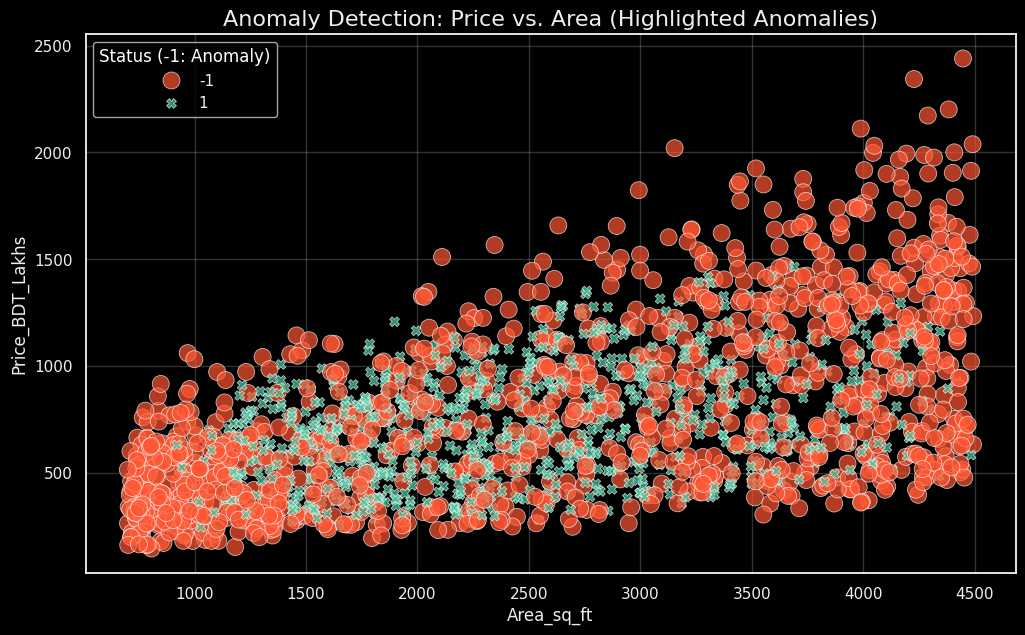

In [72]:
# --- Visualize Anomalies (Example: Price vs. Area, colored by Anomaly Flag) ---
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_cleaned,
    x='Area_sq_ft',
    y=target_col,
    hue='Anomaly_Flag_IsolationForest',
    style='Anomaly_Flag_IsolationForest',
    palette={1: modern_palette_dark[0], -1: modern_palette_dark[3]},
    size='Anomaly_Flag_IsolationForest',
    sizes={1: 50, -1: 150},
    alpha=0.7
)

plt.title('Anomaly Detection: Price vs. Area (Highlighted Anomalies)', fontsize=16, color=modern_palette_dark[2])
plt.xlabel('Area_sq_ft', color=modern_palette_dark[2])
plt.ylabel(target_col, color=modern_palette_dark[2])
plt.xticks(color=modern_palette_dark[2])
plt.yticks(color=modern_palette_dark[2])
plt.legend(title='Status (-1: Anomaly)', labelcolor=modern_palette_dark[2])
plt.grid(alpha=0.2)
plt.show()



In [73]:
# --- Interpreting Discovered Clusters (from K-Means on original scaled features) ---
# Let's perform K-Means on the full X_processed to see different segments
print("\n--- Clustering on Full Processed Feature Set (for interpretation) ---")
num_full_clusters = 4 # Define number of segments
kmeans_full = KMeans(n_clusters=num_full_clusters, random_state=42, n_init='auto')
df_cleaned['Cluster_FullFeatures'] = kmeans_full.fit_predict(X_processed) # Use the fully processed (scaled & OHE) features

print(f"\n--- Mean Characteristics per Full-Feature K-Means Cluster (Original Scale) ---")
# For interpretation, group by cluster label on df_cleaned (original scales)
cluster_summary_full = df_cleaned.groupby('Cluster_FullFeatures')[numerical_features + [target_col]].mean().sort_values(by=target_col, ascending=False)
display(cluster_summary_full)


--- Clustering on Full Processed Feature Set (for interpretation) ---

--- Mean Characteristics per Full-Feature K-Means Cluster (Original Scale) ---


Area_sq_ft  Num_Bedrooms  Num_Bathrooms  \
Cluster_FullFeatures                                            
1                       2573.655         4.331          3.720   
0                       2270.663         2.813          1.827   
2                       2400.628         2.933          1.962   
3                       2962.263         2.937          1.912   

                      Age_of_Property_years  Floor_Level  \
Cluster_FullFeatures                                       
1                                    16.912        5.027   
0                                    13.626        3.543   
2                                    15.182       11.567   
3                                    22.441        3.828   

                      Proximity_to_Main_Road_km  Nearby_Amenities_Score  \
Cluster_FullFeatures                                                      
1                                         0.563                   4.890   
0                                         0.639                   6.006   
2                                         0.519                   4.687   
3                                         0.432                   3.518   

                      Latitude  Longitude  Price_BDT_Lakhs  
Cluster_FullFeatures                                        
1                       23.793     90.393          937.537  
0                       23.795     90.398          760.261  
2                       23.791     90.393          708.673  
3                       23.782     90.390          687.619

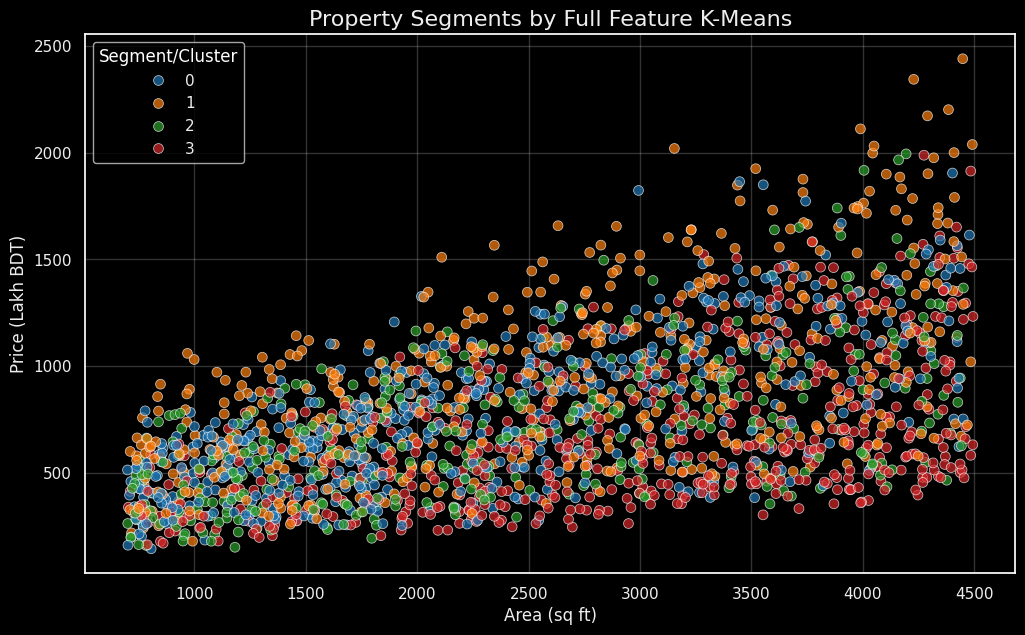

In [74]:
# Visualizing these cluster characteristics (e.g. Price vs Area colored by cluster)
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_cleaned, x='Area_sq_ft', y=target_col, hue='Cluster_FullFeatures', palette='tab10', s=50, alpha=0.7)
plt.title('Property Segments by Full Feature K-Means', fontsize=16, color=modern_palette_dark[2])
plt.xlabel('Area (sq ft)', color=modern_palette_dark[2])
plt.ylabel('Price (Lakh BDT)', color=modern_palette_dark[2])
plt.legend(title='Segment/Cluster', labelcolor=modern_palette_dark[2])
plt.xticks(color=modern_palette_dark[2])
plt.yticks(color=modern_palette_dark[2])
plt.grid(alpha=0.2)
plt.show()

In [83]:
# further analysis categorical feature distribution per cluster:
print(f"\n--- Location Distribution per Full-Feature K-Means Cluster ---")
display(pd.crosstab(df_cleaned['Cluster_FullFeatures'], df_cleaned['Location_Name'], normalize='index').style.background_gradient(cmap='cividis'))


--- Location Distribution per Full-Feature K-Means Cluster ---


In [84]:
print(f"\n--- Property Type Distribution per Full-Feature K-Means Cluster ---")
display(pd.crosstab(df_cleaned['Cluster_FullFeatures'], df_cleaned['Property_Type'], normalize='index').style.background_gradient(cmap='cividis'))


--- Property Type Distribution per Full-Feature K-Means Cluster ---


### 12. Conclusion & Next Steps

**Conclusion:**
This project demonstrated a comprehensive workflow for AI-powered data visualization using a synthetic Dhaka Housing dataset. We began by generating realistic data, then moved through EDA, cleaning, and transformation, always with a focus on creating visually appealing and informative graphics in a modern, dark style.

Key AI-driven visualization techniques included:
* Interactive maps (Folium) and charts (Plotly) for user-driven exploration.
* Dimensionality reduction (PCA) to visualize high-dimensional data in 2D, colored by key attributes.
* Clustering (K-Means) to automatically segment properties, with results visualized on PCA plots and characteristics analyzed.
* Training a RandomForestRegressor, not just for prediction, but as a source for visualizations like feature importance plots, SHAP summary and dependence plots (offering deep model explainability), prediction vs. actuals, and residual analysis.
* Anomaly detection (Isolation Forest) to identify unusual properties, visualized against key features.

These techniques allowed us to uncover insights into price drivers, location-based variations, property segments, and model behavior, showcasing the power of combining AI with thoughtful visualization.

**Next Steps & Potential Enhancements:**
* **Real Dataset:** Acquire and use a real-world Dhaka housing dataset for more authentic insights.
* **Advanced ML Models:** Experiment with other regression models (e.g., Gradient Boosting, XGBoost, Neural Networks) and compare their performance and SHAP explanations.
* **Hyperparameter Tuning:** Systematically tune hyperparameters for the chosen ML models to optimize performance.
* **More Sophisticated Feature Engineering:** Create more complex features (e.g., interaction terms, distance to specific landmarks using actual geospatial data).
* **Time Series Analysis:** If date/time data were available (e.g., listing date), analyze price trends over time.
* **Interactive Dashboard:** Develop an interactive dashboard (e.g., using Plotly Dash or Streamlit) to allow users to dynamically explore the data, model predictions, and visualizations.
* **Advanced Anomaly Explanation:** Dive deeper into why specific data points were flagged as anomalies.
* **Ethical Considerations:** Analyze potential biases in the data or model predictions, especially if using real-world data, to ensure fairness.

# **End of AI-Powered Data Visualization Notebook**